In [1]:
import ast
import os
import re
import tempfile
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tqdm.notebook
from IPython.display import HTML
from scipy import stats
from scipy.stats import spearmanr


## Data Processing

In [2]:

# def calculate_spearman_coefficient(merged_df, methods, score, exp_variable):
#     combinations_of_methods = list(combinations(methods, 2))
#     combined_df = pd.DataFrame()

#     for i, (method1, method2) in enumerate(combinations_of_methods):
#         df_method1 = merged_df[merged_df['method'] == method1]
#         df_method2 = merged_df[merged_df['method'] == method2]

#         df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

#         df_merged.rename(columns={
#             f'{exp_variable}_{method1}': exp_variable,
#             f'{exp_variable}_{method2}': f'{exp_variable}_other',
#             f'{score}_{method1}': score,
#             f'{score}_{method2}': f'{score}_other',
#             f'AF_plddt_{method1}': 'AF_plddt',
#             f'AF_plddt_{method2}': 'AF_plddt_other',
#         }, inplace=True)
#         df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']
#         combined_df = pd.concat([combined_df, df_merged])
        
    
#     spearman_coefficient, _ = spearmanr(
#         combined_df[exp_variable] - combined_df[f'{exp_variable}_other'],
#         combined_df[score] - combined_df[f'{score}_other'],
#         nan_policy='omit'
#     )
    

#     return spearman_coefficient, combined_df

# def calculate_spearman_coefficients(merged_df, methods, columns, exp_variable):
#     spearman_coefficients = []
#     for column in columns:
#         result, output_df= calculate_spearman_coefficient(merged_df, methods, column, exp_variable)
#         spearman_coefficients.append(result)
#     return spearman_coefficients

# methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
# columns_to_calculate = [
#     'Full Seq PLDDT',
#     'Half Masked ESMFold Average Plddt',
#     'Max Half Masked ESMFold Plddt',
#     'ESM Score',
#     'AF_plddt',
#     'inter_pae',
#     'unconditional_CE',
#     'conditional_CE',
#     'Hybrid Composite Score',
#     'log_CE_full',
#     'CE_full',
# ]

# def calculate_average(lst):
#     return sum(lst) / len(lst)

In [3]:
# merged_df= pd.read_csv('/home/jupyter-yehlin/DMSV2/dataset_final/all_4_extra_features.csv')
# df_dist_masked_ce= pd.read_csv('/home/jupyter-yehlin/DMSV2/dataset_final/ESMFold_dist/all_4_half_masked_seq_CE_total.csv')
# df_dist_full_ce= pd.read_csv('/home/jupyter-yehlin/DMSV2/dataset_final/ESMFold_dist/all_4_full_seq_CE.csv')
# df_esm_if = pd.read_csv('/home/jupyter-yehlin/DMSV2/dataset_final/ESMFold_dist/esm_if_dg.csv')
# af_esmfold_multi_conditions = pd.read_csv('/home/jupyter-yehlin/DMSV2/af2_prediction/af_emsfold_multi_conditions.csv')

In [4]:
# df_esm_if['name'] = df_esm_if['name'].str.replace('_unrelaxed_model_1', '', regex=False)
# merged_df= merged_df.merge(df_esm_if, on = 'name')
# merged_df= merged_df.merge(df_dist_masked_ce[['name', 'log_CE', 'CE', 'PLDDT']], on = 'name')
# merged_df = merged_df.rename(columns= {'log_CE':'log_CE_mask', 'CE':'CE_mask', 'PLDDT':'PLDDT_mask'})

# merged_df= merged_df.merge(df_dist_full_ce[['name', 'log_CE', 'CE', 'PLDDT']], on = 'name')
# merged_df = merged_df.rename(columns= {'log_CE':'log_CE_full', 'CE':'CE_full', 'PLDDT':'PLDDT_full'})

# merged_df['log_CE_mask'] = merged_df['log_CE_mask'].apply(ast.literal_eval)
# merged_df['CE_mask'] = merged_df['CE_mask'].apply(ast.literal_eval)
# merged_df['PLDDT_mask'] = merged_df['PLDDT_mask'].apply(ast.literal_eval)

# merged_df['CE_avg_mask'] = merged_df['CE_mask'].apply(np.mean)
# merged_df['log_CE_avg_mask'] = merged_df['log_CE_mask'].apply(np.mean)
# merged_df = merged_df.merge(af_esmfold_multi_conditions, on ='name')
# merged_df=merged_df[merged_df['inter_pae']>15]
# merged_df['deltaG'] = np.clip(merged_df['deltaG'], -1, 6)
# merged_df  =merged_df.drop_duplicates(subset='name')

# merged_df['method'] =None
# merged_df.loc[merged_df['name'].str.endswith('_TrROS'), 'method']='TrROS'
# merged_df.loc[merged_df['name'].str.endswith('_TrROS_Hall'), 'method']='TrROS_Hall'
# merged_df.loc[merged_df['name'].str.endswith('_TrMRF'), 'method']='TrMRF'
# merged_df.loc[merged_df['name'].str.endswith('_JUSTAS'), 'method']='JUSTAS'


# suffixes = ['_TrROS', '_TrROS_Hall', '_TrMRF', '_JUSTAS']

# def remove_suffix(name, suffixes):
#     for suffix in suffixes:
#         if name.endswith(suffix):
#             return name[:-len(suffix)]  # Remove the suffix
#     return name  # Return the original name if no suffix matches

# merged_df['ID'] = merged_df['name'].apply(lambda x: remove_suffix(x, suffixes))
# merged_df = merged_df.drop_duplicates(subset='name')
# merged_df['log ESM Score'] = -np.log(merged_df['ESM Score'])

In [5]:
# merged_df.to_csv('/home/jupyter-yehlin/Joint_Model_Stability/all_4_results.csv')
merged_df = pd.read_csv('/home/jupyter-yehlin/Joint_Model_Stability/all_4_results.csv')

In [6]:
merged_df

Unnamed: 0               name  \
0               0       r1_100_TrMRF   
1               1      r1_112_JUSTAS   
2               2       r1_112_TrMRF   
3               3      r1_114_JUSTAS   
4               4       r1_114_TrMRF   
...           ...                ...   
13437       16185       r20_92_TrROS   
13438       16186  r20_92_TrROS_Hall   
13439       16188      r20_93_JUSTAS   
13440       16189       r20_93_TrMRF   
13441       16190  r20_93_TrROS_Hall   

                                                sequence  Full Seq PLDDT  \
0      GLTVTLDGNSLTVTADAGDKTVTVTAPVFHPEKGLVTVVTVTATRE...       58.422199   
1      AAVIPTPTAEPVKVETLSTEVSPSLFPSPAAGGPRVLRTVVTTKTT...       49.825714   
2      EPIIPDEKDKPLLLKVLSVEVDPEIYPLPGPKGPPVLKVKVKVKMK...       72.583153   
3      MKYTLTLTDPTTPTTSTLTVPNDPEKALALLREAKAANPNLTATLT...       67.623634   
4      PKYVIKAVNPKVGEVKTIEVDDDPEKAIEALKALKKADPDIKFYIS...       72.866875   
...                                                  ...             ...   
13437  SAGGSAGGSMRLDLDDIKRVEREPTPNGMRVYEIKLKGHKLPIRYH...       49.987293   
13438  SAGGSAGGSKKISLKDIKKVEVKKNKNGTYEVTIEVNGKKLTLTIK...       64.854721   
13439  SAGGSAGGSMVTIPTGTEEEVEKVIAELEKKGLKPKKVEKEGNKVT...       71.277779   
13440  SAGGSAGGSGITIPAGSPEKVYELLSALEKLGFKPKKVSVSGNYVI...       61.475655   
13441  SAGGSAGGSMIKIKVKSKEDVEALIKELEKAGFKVKKVEEVDGKVY...       68.595001   

                               Half Masked ESMFold Plddt  \
0      [64.6432876586914, 74.1005630493164, 59.182521...   
1      [52.30461502075195, 46.26884841918945, 51.3183...   
2      [65.5413589477539, 74.89350128173828, 74.73935...   
3      [72.70405578613281, 74.25083923339844, 71.3305...   
4      [72.7770767211914, 75.95297241210938, 79.61795...   
...                                                  ...   
13437  [58.10380172729492, 60.14301300048828, 58.3217...   
13438  [66.70665740966797, 67.7982406616211, 66.52462...   
13439  [71.19159698486328, 71.97462463378906, 72.5434...   
13440  [62.65907287597656, 56.4908332824707, 58.47431...   
13441  [64.61222076416016, 70.38296508789062, 71.7899...   

       Max Half Masked ESMFold Plddt  Half Masked ESMFold Average Plddt  \
0                          78.155617                          68.850083   
1                          59.801086                          51.408702   
2                          76.204399                          73.124226   
3                          76.153542                          72.416568   
4                          79.617958                          75.630673   
...                              ...                                ...   
13437                      63.921467                          58.285631   
13438                      67.956825                          66.819820   
13439                      72.929924                          70.181142   
13440                      63.021320                          58.622167   
13441                      74.033813                          71.194989   

       ESM Score   AF_plddt  inter_pae  ...  esmfold_plddt_recyc1  \
0       8.110335  50.909468  23.673170  ...             58.268772   
1       9.519074  41.218556  23.164436  ...             51.167538   
2       9.717855  62.042255  15.651415  ...             67.043976   
3       6.655916  72.690824  29.297585  ...             65.680020   
4       8.796176  79.166944  29.265888  ...             72.308030   
...          ...        ...        ...  ...                   ...   
13437   7.339795  62.156193  27.746200  ...             52.005560   
13438   2.966840  62.568619  16.284712  ...             61.561470   
13439   3.619266  84.365257  27.815495  ...             64.598160   
13440   4.592780  72.783848  15.311255  ...             64.616910   
13441   3.521370  84.312817  25.276363  ...             66.584650   

       esmfold_plddt_recyc2  esmfold_plddt_recyc3  esmfold_plddt_recyc4  \
0                 73.459030             73.557050             69.753280   
1           

In [8]:
filtered_data = merged_df[
    (merged_df['conditional_CE'] >= 1.6) & 
    (merged_df['conditional_CE'] < 1.7) & 
    (merged_df['AF_plddt'] > 80)
]

503


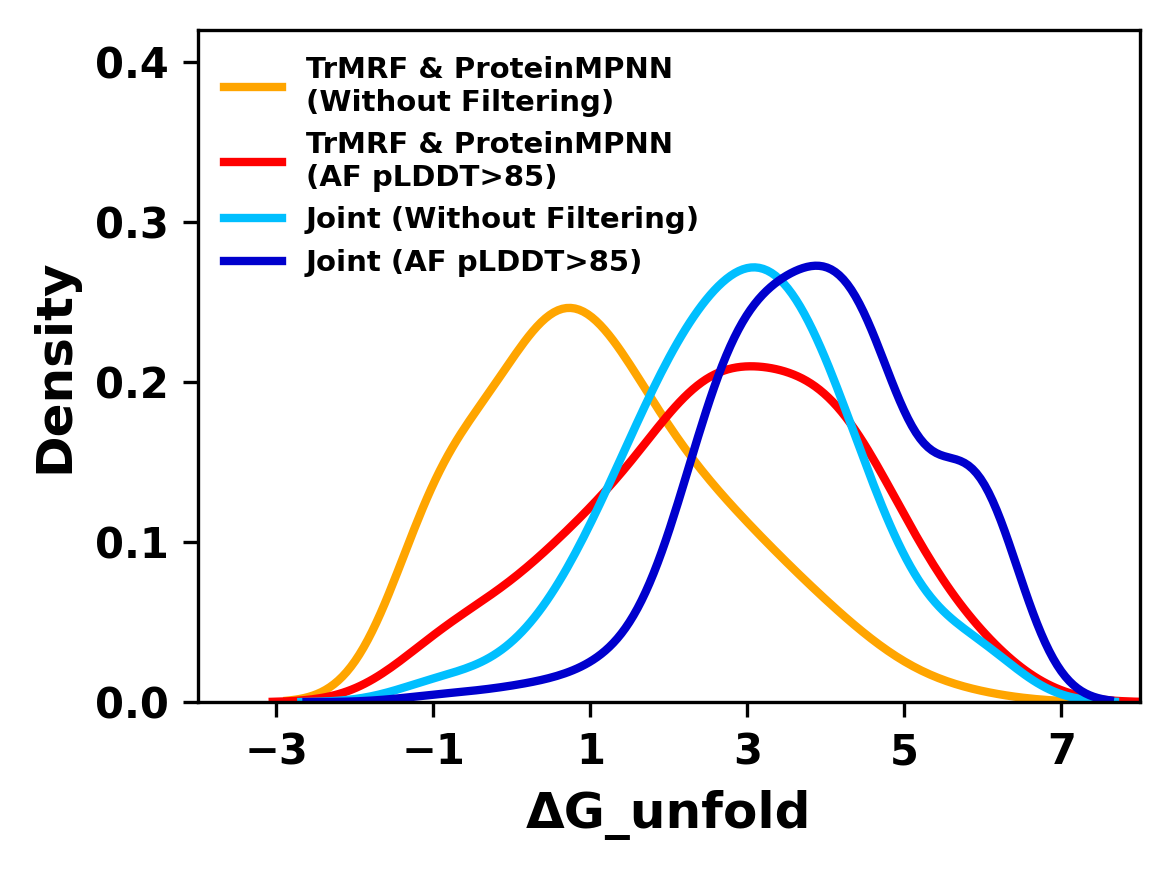

In [9]:
df_trmrf_mpnn = merged_df[(merged_df['method']=='TrMRF') |(merged_df['method']=='JUSTAS')]
df_joint = merged_df[(merged_df['method']=='TrROS_Hall')]
df_trmrf_mpnn_good_design = df_trmrf_mpnn[(df_trmrf_mpnn['af_plddt_recyc3']>85)]
df_joint_good_design = df_joint[(df_joint['af_plddt_recyc3']>85)]
print(len(df_trmrf_mpnn_good_design))


plt.figure(figsize=(4, 3),dpi = 300)

# Plot KDE for TrMRF & JUSTAS (AF>80)
sns.kdeplot(df_trmrf_mpnn['deltaG'], 
            color='orange', 
            label='TrMRF & ProteinMPNN \n(Without Filtering)', 
            bw_method=0.4,
            linewidth = 2
            )



sns.kdeplot(df_trmrf_mpnn_good_design['deltaG'], 
            color='red', 
            label='TrMRF & ProteinMPNN \n(AF pLDDT>85)', 
            bw_method=0.4,
            linewidth = 2
            )

# Plot KDE for TrROS_Hall
sns.kdeplot(df_joint['deltaG'], 
            color='deepskyblue', 
            label='Joint (Without Filtering)', 
            bw_method=0.4,
            linewidth = 2
            )


# Plot KDE for TrROS_Hall
sns.kdeplot(df_joint_good_design['deltaG'], 
            color='mediumblue', 
            label='Joint (AF pLDDT>85)', 
            bw_method=0.4,
            linewidth = 2
            )

plt.ylim([0,0.42])
plt.xlim(-4,8)
plt.xticks(np.arange(-3, 8, 2))
plt.xlabel('ΔG_unfold', fontweight='bold', fontsize = 12)
plt.ylabel('Density', fontweight='bold', fontsize = 12)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.legend(frameon=False, loc ='upper left', prop={'size': 7, 'weight':'bold'})

plt.tight_layout()
plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/Joint_no_filtering_TrMRF_MPNN_joint_filtering_default_af.png', dpi=300)
plt.show()

In [10]:
merged_df['n_hydrophobic']=merged_df['sequence'].str.count('A|I|L|M|F|V|P|W')
merged_df['high_plddt']=False
merged_df.loc[merged_df['af_plddt_recyc0']>70, 'high_plddt']=True

69


/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


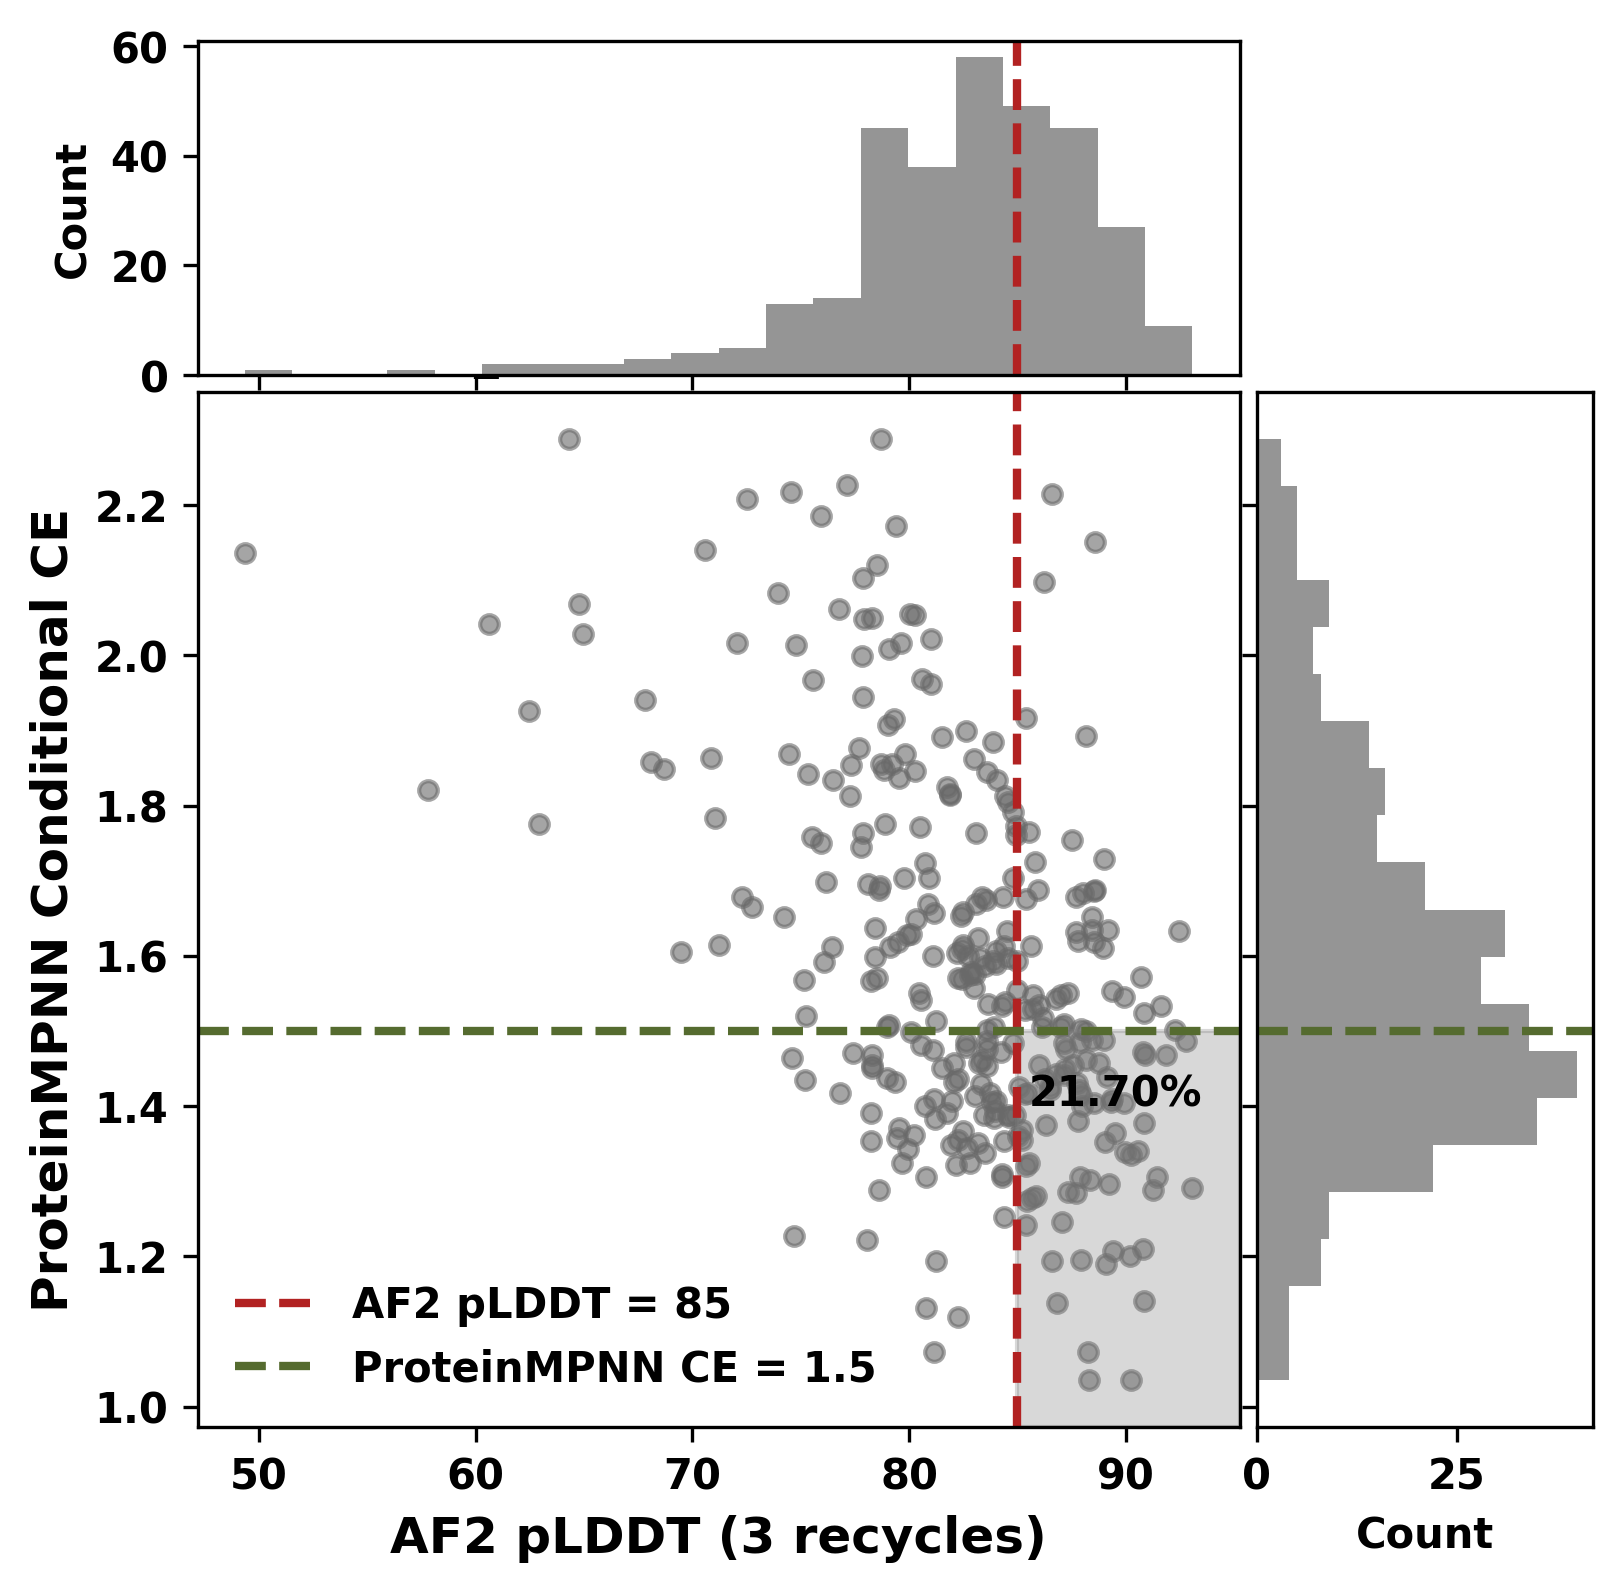

In [11]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Assuming merged_df is already defined and has the necessary columns
designs_above_threshold = merged_df[merged_df['deltaG'] >5]

# Filter for pLDDT > 85 and CE < 1.4 among those designs
filtered_designs = designs_above_threshold[(designs_above_threshold['af_plddt_recyc3'] > 85) & 
                                           (designs_above_threshold['conditional_CE'] < 1.5)]

print(len(filtered_designs))
percentage = (len(filtered_designs) / len(designs_above_threshold)) * 100

# Setting up the plot with gridspec
fig = plt.figure(figsize=(6, 6), dpi=300)
gs = gridspec.GridSpec(4, 4, fig, wspace=0.05, hspace=0.05)

# Scatter plot
ax_scatter = fig.add_subplot(gs[1:4, 0:3])
ax_scatter.scatter(designs_above_threshold['af_plddt_recyc3'], 
                   designs_above_threshold['conditional_CE'], 
                   s=20, color='dimgray', alpha=0.6)

# Add vertical line for pLDDT threshold
ax_scatter.axvline(x=85, color='firebrick', linestyle='--', linewidth=2, label='AF2 pLDDT = 85')

# Add horizontal line for CE threshold
ax_scatter.axhline(y=1.5, color='darkolivegreen', linestyle='--', linewidth=2, label='ProteinMPNN CE = 1.5')

# Shaded region for designs meeting criteria
x_min, x_max = ax_scatter.get_xlim()
y_min, y_max = ax_scatter.get_ylim()
ax_scatter.fill_betweenx(y=[y_min, 1.5], x1=85, x2=x_max, color='gray', alpha=0.3)

# Annotate percentage in the shaded region
ax_scatter.text(85 + (x_max - 85) * 0.05, 1.4, f"{percentage:.2f}%", color="black", fontsize=10, weight='bold')

# Labeling and ticks for scatter plot
ax_scatter.set_xlabel('AF2 pLDDT (3 recycles)', fontsize=12, fontweight='bold')
ax_scatter.set_ylabel('ProteinMPNN Conditional CE', fontsize=12, fontweight='bold')
ax_scatter.set_title(f'Sequences with \nΔG_unfold < 0 kcal/mol', fontsize=12, fontweight='bold')
ax_scatter.legend(frameon=False, loc='lower left', prop={'weight':'bold'})
ax_scatter.set_xlim([x_min, x_max])
ax_scatter.set_ylim([y_min, y_max])

# Top histogram (pLDDT)
ax_histx = fig.add_subplot(gs[0, 0:3], sharex=ax_scatter)
ax_histx.hist(designs_above_threshold['af_plddt_recyc3'], bins=20, color='dimgray', alpha=0.7)
ax_histx.axvline(x=85, color='firebrick', linestyle='--', linewidth=2)
ax_histx.set_ylabel("Count", fontsize=10, fontweight='bold')
ax_histx.tick_params(axis="x", labelbottom=False)

# Right histogram (Conditional CE)
ax_histy = fig.add_subplot(gs[1:4, 3], sharey=ax_scatter)
ax_histy.hist(designs_above_threshold['conditional_CE'], bins=20, orientation='horizontal', color='dimgray', alpha=0.7)
ax_histy.axhline(y=1.5, color='darkolivegreen', linestyle='--', linewidth=2)
ax_histy.set_xlabel("Count", fontsize=10, fontweight='bold')
ax_histy.tick_params(axis="y", labelleft=False)
for label in ax_histx.get_yticklabels():
    label.set_fontweight('bold')

# Make x and y tick labels bold for the scatter plot
for label in (ax_scatter.get_xticklabels() + ax_scatter.get_yticklabels()):
    label.set_fontweight('bold')

for label in ax_histy.get_xticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/MPNN_AF2_designs_dG5_above0_with_histograms_default.png', dpi=300)
plt.show()

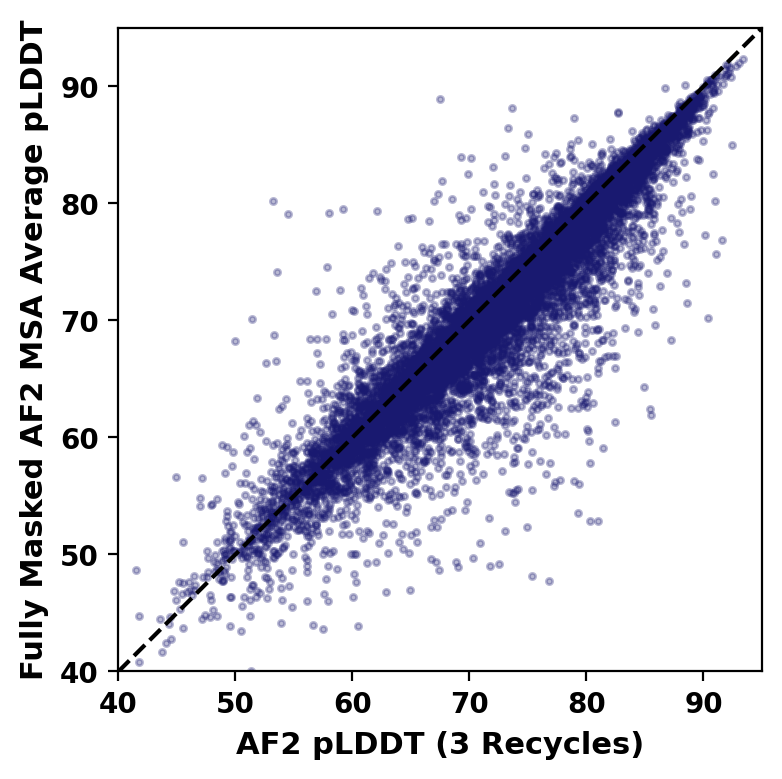

In [12]:
plt.figure(figsize=(4, 4), dpi =200)
plt.scatter(merged_df['af_plddt_recyc3'], merged_df['af_plddt_mask1_recyc2_avg8'], s=5, alpha=0.3, color='midnightblue')

# Add reference line
plt.plot([40, 95], [40, 95], color='black', linestyle='--')

# Set x and y axis limits to be the same for a 1:1 scale
plt.xlim(40, 95)
plt.ylim(40, 95)

# Ensure both axes have the same aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

# Set bold font for axis labels and ticks
plt.xlabel('AF2 pLDDT (3 Recycles)', fontsize=11, fontweight='bold')
plt.ylabel('Fully Masked AF2 MSA Average pLDDT', fontsize=11, fontweight='bold')

# Make x and y tick labels bold
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()


## dG

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
from sklearn.model_selection import train_test_split

def get_correlation(df, x_column, y_column):
    df_no_nan = df[[x_column, y_column]].dropna()
    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])
    return pearson_coefficient, spearman_coefficient

def Hybrid_score_ratio_scanning(ylabel, ratio, df):
    df['Hybrid Composite Score 1'] = -ratio * df['conditional_CE'] + (1 - ratio) * df['avg_mask_esmfold_plddt_recyc2']
    df['Hybrid Composite Score 2'] = -ratio * df['conditional_CE'] + (1 - ratio) * df['af_plddt_mask1_recyc0_avg8']
    df['Hybrid Composite Score 3'] = ratio * df['log ESM Score'] + (1 - ratio) * df['avg_mask_esmfold_plddt_recyc2']
    df['Hybrid Composite Score 4'] = ratio * df['dg_IF'] + (1 - ratio) * df['avg_mask_esmfold_plddt_recyc2']
    df['Hybrid Composite Score 5'] = -ratio * df['log ESM Score'] + (1 - ratio) * df['CE_avg_mask']
    df['Hybrid Composite Score 6'] = ratio * df['log ESM Score']  + (1 - ratio) * df['af_plddt_mask1_recyc0_avg8']
    

    p1, s1 = get_correlation(df, 'Hybrid Composite Score 1', ylabel)
    p2, s2 = get_correlation(df, 'Hybrid Composite Score 2', ylabel)
    p3, s3 = get_correlation(df, 'Hybrid Composite Score 3', ylabel)
    p4, s4 = get_correlation(df, 'Hybrid Composite Score 4', ylabel)
    p5, s5 = get_correlation(df, 'Hybrid Composite Score 5', ylabel)
    p6, s6 = get_correlation(df, 'Hybrid Composite Score 6', ylabel)
    
    return [p1, s1, p2, s2, p3, s3, p4, s4,p5, s5, p6, s6], df


train, test = train_test_split(merged_df, test_size=0.8, random_state=42)

ratio = np.linspace(0, 1, 161)
correlation_ls = []

for numb in ratio:
    score, _ = Hybrid_score_ratio_scanning('deltaG', numb, train) 
    correlation_ls.append(score)

correlation_ls = np.array(correlation_ls)


max_ratio1_index = np.argmax(correlation_ls[:, 1])
max_ratio2_index = np.argmax(np.abs(correlation_ls[:, 3]))
max_ratio3_index = np.argmax(np.abs(correlation_ls[:, 5]))
max_ratio4_index = np.argmax(np.abs(correlation_ls[:, 7]))
max_ratio5_index = np.argmax(np.abs(correlation_ls[:, 9]))
max_ratio6_index = np.argmax(np.abs(correlation_ls[:, 11]))

max_ratio1 = ratio[max_ratio1_index]
max_ratio2 = ratio[max_ratio2_index]
max_ratio3 = ratio[max_ratio3_index]
max_ratio4 = ratio[max_ratio4_index]
max_ratio5 = ratio[max_ratio5_index]
max_ratio6 = ratio[max_ratio6_index]


print("For the first hybrid score:")
print("Maximum Spearman correlation:", correlation_ls[max_ratio1_index, 1])
print("Corresponding ratio:", max_ratio1)

print("\nFor the second hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio2_index, 3]))
print("Corresponding ratio:", max_ratio2)

print("\nFor the third hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio3_index, 5]))
print("Corresponding ratio:", max_ratio3)

print("\nFor the fourth hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio4_index, 7]))
print("Corresponding ratio:", max_ratio4)


print("\nFor the third hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio3_index, 9]))
print("Corresponding ratio:", max_ratio5)

print("\nFor the fourth hybrid score:")
print("Maximum Spearman correlation:", np.abs(correlation_ls[max_ratio4_index, 11]))
print("Corresponding ratio:", max_ratio6)


test['Hybrid Composite Score 1'] = -max_ratio1 * test['conditional_CE'] + (1 - max_ratio1) * test['avg_mask_esmfold_plddt_recyc2']
test['Hybrid Composite Score 2'] = -max_ratio2 * test['conditional_CE'] +(1 - max_ratio2) * test['af_plddt_mask1_recyc0_avg8']
test['Hybrid Composite Score 3'] = max_ratio3 * test['log ESM Score'] + (1 - max_ratio3) * test['avg_mask_esmfold_plddt_recyc2']
test['Hybrid Composite Score 4'] = max_ratio4 * test['dg_IF'] + (1 - max_ratio4) * test['avg_mask_esmfold_plddt_recyc2']
test['Hybrid Composite Score 5'] = -max_ratio5 * test['conditional_CE'] + (1 - max_ratio5) * test['CE_avg_mask']
test['Hybrid Composite Score 6'] = max_ratio6 * test['log ESM Score']  + (1 - max_ratio6) * test['af_plddt_mask1_recyc0_avg8']

spearman_scores = [
    spearmanr(test['deltaG'], test['Hybrid Composite Score 1']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 2']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 3']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 4']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 5']),
    spearmanr(test['deltaG'], test['Hybrid Composite Score 6']),
]

for idx, (corr, p_value) in enumerate(spearman_scores):
    print(f"\nHybrid Composite Score {idx + 1}: Correlation = {corr}, p-value = {p_value}")

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

For the first hybrid score:
Maximum Spearman correlation: 0.5292924863615169
Corresponding ratio: 0.9

For the second hybrid score:
Maximum Spearman correlation: 0.5549842884870244
Corresponding ratio: 0.9

For the third hybrid score:
Maximum Spearman correlation: 0.5422414902575293
Corresponding ratio: 0.8562500000000001

For the fourth hybrid score:
Maximum Spearman correlation: 0.5212397315338293
Corresponding ratio: 0.0

For the third hybrid score:
Maximum Spearman correlation: 0.1020785544600686
Corresponding ratio: 0.0

For the fourth hybrid score:
Maximum Spearman correlation: 0.5434849902455647
Corresponding ratio: 0.675

Hybrid Composite Score 1: Correlation = 0.5263159244842621, p-value = 0.0

Hybrid Composite Score 2: Correlation = 0.549305975471026, p-value = 0.0

Hybrid Composite Score 3: Correlation = 0.5410780634993323, p-value = 0.0

Hybrid Composite Score 4: Correlation = 0.521204052733094, p-value = 0.0

Hybrid Composite Score 5: Correlation = 0.2811094826043856, p-va

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:85: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:86: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [14]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

def scatter_and_correlation(ax, df, x_column, y_column, label_x, label_y, xlim=None, ylim=None):

    df_no_nan = df[[x_column, y_column]].dropna()

    ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), color='black')
    ax.set_title(f'{label_x} vs {label_y}')
    ax.set_xlabel(label_x)
    ax.set_ylabel(label_y)


    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)


    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])
    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    ax.text(0.5, 0.95, f"Pearson Coeff: {pearson_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)
    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=10)

    return pearson_coefficient, spearman_coefficient


def plot_experiment_vs_computation(ylabel ='log10_K50_t'):
    
    fig, axs = plt.subplots(2, 10, figsize=(20, 6), dpi=200)
    axs = axs.flatten()

    p1,s1=scatter_and_correlation(axs[0], test, 'esmfold_plddt_recyc3', ylabel, 'Full Seq pLDDT', ylabel, xlim=(20, 100), ylim=(-4, 6))
    p2,s2=scatter_and_correlation(axs[1], test, 'avg_mask_esmfold_plddt_recyc2', ylabel, 'Half Masked ESMFold Average pLDDT', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p3,s3=scatter_and_correlation(axs[2], test, 'Max Half Masked ESMFold Plddt', ylabel, 'Max Half Masked ESMFold pLDDT', ylabel, xlim=(20, 100),   ylim=(-4, 6))
    p4,s4=scatter_and_correlation(axs[3], test, 'log ESM Score', ylabel, 'log ESM Score', ylabel, xlim=(0, 20),  ylim=(-4, 6))
    p5,s5=scatter_and_correlation(axs[4], test, 'af_plddt_recyc3', ylabel, 'AF-Plddt', ylabel, xlim=(35, 100), ylim=(-4, 6))
    p6,s6=scatter_and_correlation(axs[5], test, 'af_plddt_mask1_recyc0_avg8',ylabel, 'Half Masked AF-Plddt', ylabel, xlim=(15, 40),  ylim=(-4, 6))
    p7,s7=scatter_and_correlation(axs[6], test, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5), ylim=(-4, 6))
    p8,s8=scatter_and_correlation(axs[7], test, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel, xlim=(1, 2.5),  ylim=(-4, 6))
    p9,s9=scatter_and_correlation(axs[8], test, 'Hybrid Composite Score 1', ylabel, 'Hybrid Composite Score', ylabel, xlim=(-5, 0),  ylim=(-4, 6))
    p10,s10=scatter_and_correlation(axs[9], test, 'log_CE_full', ylabel, 'log ESMFold Distogram CE', ylabel, xlim=(0, 10),  ylim=(-4, 6))
    p11,s11=scatter_and_correlation(axs[10], test, 'CE_full', ylabel, 'ESMFold Distogram CE', ylabel, xlim=(0, 1),  ylim=(-4, 6))
    p12,s12=scatter_and_correlation(axs[11], test, 'Hybrid Composite Score 2', ylabel, 'Hybrid Composite Score 2', ylabel,  xlim=(-0.25, 0.5),  ylim=(-4, 6))
    p13,s13=scatter_and_correlation(axs[12], test, 'log_CE_avg_mask', ylabel, 'log Half Masked ESMFold Distogram CE', ylabel, xlim=(0, 10),  ylim=(-4, 6))
    p14,s14=scatter_and_correlation(axs[13], test, 'CE_avg_mask', ylabel, 'Half Masked ESMFold Distogram CE', ylabel, xlim=(0, 1),  ylim=(-4, 6))
    p15,s15=scatter_and_correlation(axs[14], test, 'Hybrid Composite Score 3', ylabel, 'Hybrid Composite Score 3', ylabel,  xlim=(-0.25, 0.5),  ylim=(-4, 6))
    p16,s16=scatter_and_correlation(axs[15], test, 'dg_IF', ylabel, 'ESM-IF Summed Likelihoods', ylabel, xlim=(4, 50),  ylim=(-4, 6))
    p17,s17=scatter_and_correlation(axs[16], test, 'Hybrid Composite Score 4', ylabel, 'Hybrid Composite Score 4', ylabel, xlim=(4, 50),  ylim=(-4, 6))
    p18,s18=scatter_and_correlation(axs[17], test, 'Hybrid Composite Score 5', ylabel, 'Hybrid Composite Score 5', ylabel, xlim=(4, 50),  ylim=(-4, 6))
    p19,s19=scatter_and_correlation(axs[18], test, 'Hybrid Composite Score 6', ylabel, 'Hybrid Composite Score 6', ylabel, xlim=(4, 50),  ylim=(-4, 6))


    K_t_p = [p1, p2,p3,p4,p5,p6,p7,p8,p9, p10, p11, p12, p13,p14,p15, p16, p17,p18, p19]
    K_t_s = [s1, s2,s3,s4,s5,s6,s7,s8,s9, s10, s11, s12,s13,s14,s15, s16, s17,s18, s19]


    plt.tight_layout()
    plt.show()
    
    return K_t_p, K_t_s

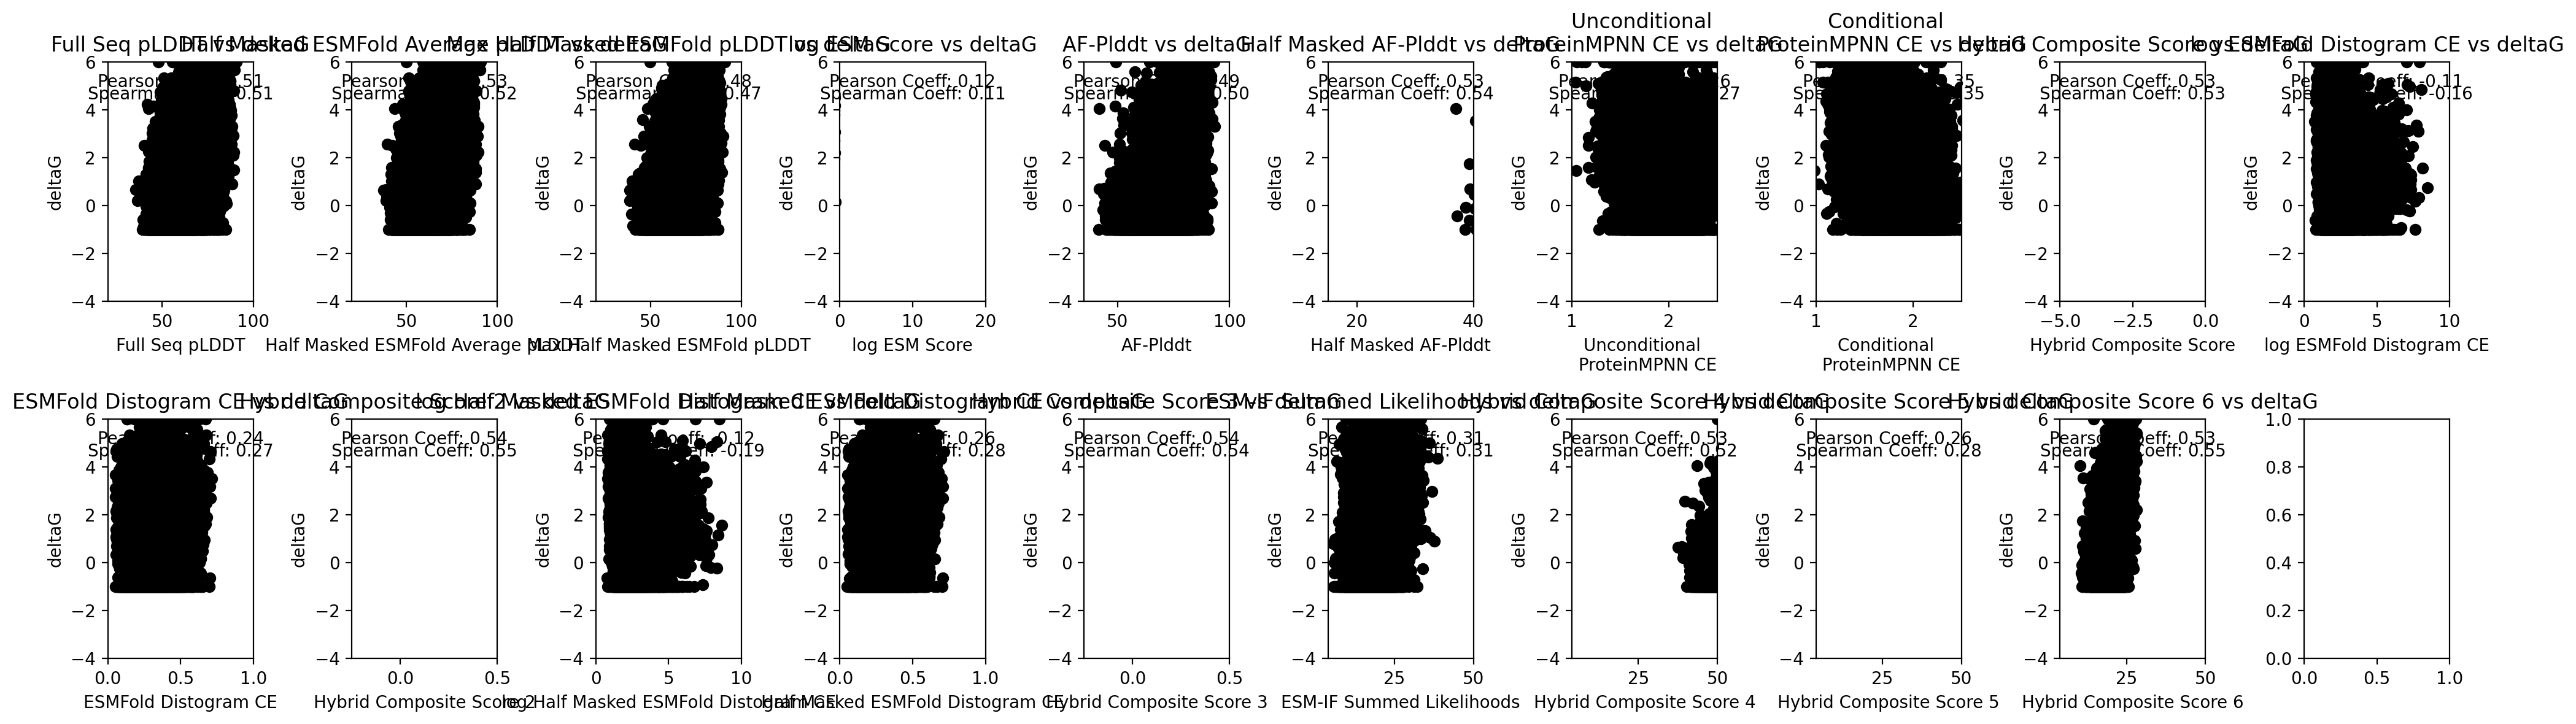

In [15]:
G_p, G_s= plot_experiment_vs_computation(ylabel ='deltaG')

In [16]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 1
bar_width = 0.02
index = np.arange(num_groups)

data_p = [G_p]
data_s = [G_s]

data_p = np.abs(np.array(data_p))
data_s = np.abs(np.array(data_s))

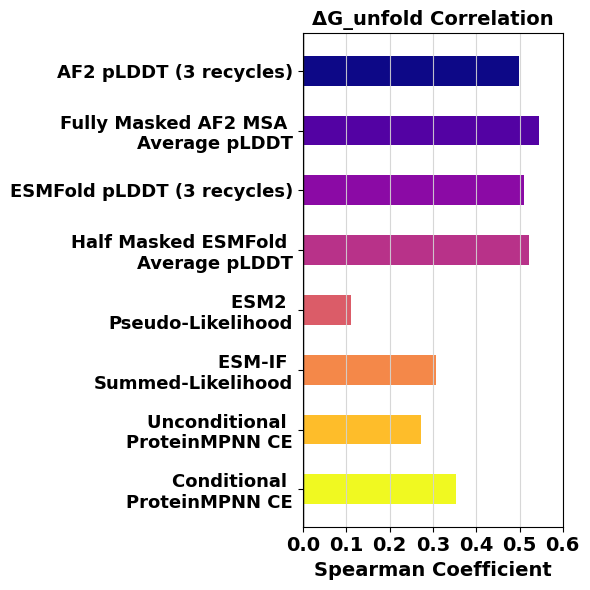

In [17]:

index = np.arange(1)
bar_width = 0.5  
bar_position= 1

colors = plt.cm.plasma(np.linspace(0, 1, 8))

plt.figure(figsize=(6, 6))


plt.barh(index +7 *bar_position,  data_s[:, 4], bar_width, label='AF2 pLDDT (3 recycles)', color=colors[0])
plt.barh(index +6 *bar_position,  data_s[:, 5], bar_width, label='Fully Masked AF2 MSA Average pLDDT', color=colors[1])
plt.barh(index +5*bar_position, data_s[:, 0], bar_width, label='ESMFold pLDDT (3 recycles)', color=colors[2])
plt.barh(index +4*bar_position, data_s[:, 1], bar_width, label='Half Masked ESMFold Average pLDDT', color=colors[3])
plt.barh(index +3 * bar_position, data_s[:, 3], bar_width, label='ESM2 Pseudo-Likelihood', color=colors[4])
plt.barh(index +2 * bar_position, data_s[:, 15], bar_width, label='ESM-IF Summed-Likelihood', color=colors[5])
plt.barh(index +1 * bar_position, data_s[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color=colors[6])
plt.barh(index, data_s[:, 7], bar_width, label='Conditional ProteinMPNN CE', color=colors[7])


plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

plt.title('ΔG_unfold Correlation', fontsize=14, weight='bold')
plt.xlabel('Spearman Coefficient', fontsize=14, weight='bold')

plt.xlim([0, 0.6])  


ytick_labels = [
    'AF2 pLDDT (3 recycles)',
    'Fully Masked AF2 MSA \nAverage pLDDT',
    'ESMFold pLDDT (3 recycles)',
    'Half Masked ESMFold \nAverage pLDDT',
    'ESM2 \nPseudo-Likelihood',
    'ESM-IF \nSummed-Likelihood',
    'Unconditional \nProteinMPNN CE',
    'Conditional \nProteinMPNN CE'
][::-1]


plt.grid(True, axis='x', color='lightgrey', alpha=0.9)  

plt.xticks(np.arange(0, 0.65, 0.1), fontsize=14, weight='bold')
plt.yticks(np.arange(8), ytick_labels, fontsize=13, weight='bold')

plt.tight_layout()
plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/models_spearman_coefficient_viridis_logESM_horizontal_short.png', dpi=300)
plt.show()

## ddG

In [18]:
import pandas as pd
from scipy.stats import spearmanr
from itertools import combinations

def calculate_spearman_coefficient(merged_df, methods, score, exp_variable):
    combinations_of_methods = list(combinations(methods, 2))
    combined_df = pd.DataFrame()

    for i, (method1, method2) in enumerate(combinations_of_methods):

        df_method1 = merged_df[merged_df['method'] == method1]
        df_method2 = merged_df[merged_df['method'] == method2]

        df_merged = pd.merge(df_method1, df_method2, on='ID', suffixes=(f'_{method1}', f'_{method2}'))

        df_merged.rename(columns={
            f'{exp_variable}_{method1}': exp_variable,
            f'{exp_variable}_{method2}': f'{exp_variable}_other',
            f'{score}_{method1}': score,
            f'{score}_{method2}': f'{score}_other',
            f'AF_plddt_{method1}': 'AF_plddt',
            f'AF_plddt_{method2}': 'AF_plddt_other',
        }, inplace=True)


        df_merged['PLDDT_diff'] = df_merged['AF_plddt'] - df_merged['AF_plddt_other']
        combined_df = pd.concat([combined_df, df_merged])
        

    spearman_coefficient, _ = spearmanr(
        combined_df[exp_variable] - combined_df[f'{exp_variable}_other'],
        combined_df[score] - combined_df[f'{score}_other'],
        nan_policy='omit'
    )
    

    return spearman_coefficient, combined_df


def calculate_spearman_coefficients(merged_df, methods, columns, exp_variable):
    spearman_coefficients = []
    for column in columns:
        result, output_df= calculate_spearman_coefficient(merged_df, methods, column, exp_variable)
        spearman_coefficients.append(result)
    return spearman_coefficients, output_df


In [19]:
methods = ['TrROS', 'TrMRF', 'TrROS_Hall', 'JUSTAS']
columns_to_calculate = [
    'esmfold_plddt_recyc3',
    'avg_mask_esmfold_plddt_recyc2',
    'Max Half Masked ESMFold Plddt',
    'log ESM Score',
    'af_plddt_recyc3',
    'af_plddt_mask1_recyc0_avg8',
    'unconditional_CE',
    'conditional_CE',
    'Hybrid Composite Score 1',
    'log_CE_full',
    'CE_full',
    'Hybrid Composite Score 2',
    'log_CE_avg_mask',
    'CE_avg_mask',
    'Hybrid Composite Score 3',
    'dg_IF',
    'Hybrid Composite Score 4',
    'Hybrid Composite Score 5',
    'Hybrid Composite Score 6',
]

delta_G_s, _ = calculate_spearman_coefficients(test, methods, columns_to_calculate, 'deltaG')

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [20]:
id_counts = merged_df['ID'].value_counts().to_dict()

In [21]:
import numpy as np
import matplotlib.pyplot as plt

num_groups = 1
bar_width = 0.08
index = np.arange(num_groups)

dd_s = [delta_G_s]
dd_s = np.abs(np.array(dd_s))

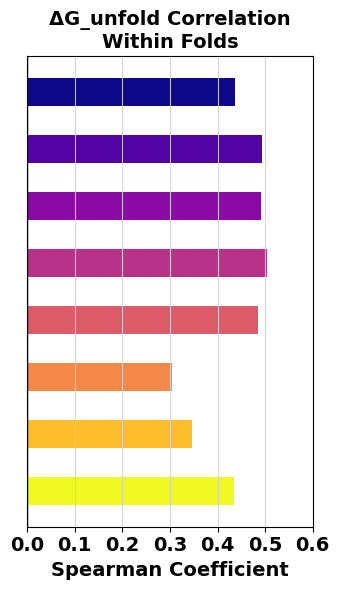

In [22]:

index = np.arange(1)
bar_width = 0.5 
bar_position= 1


colors = plt.cm.plasma(np.linspace(0, 1, 8))

plt.figure(figsize=(3.5, 6))


plt.barh(index +7 *bar_position, dd_s[:, 4], bar_width, label='AF2 pLDDT (3 Recycles)', color =colors[0])
plt.barh(index +6 *bar_position, dd_s[:, 5], bar_width, label='Fully Masked AlphaFold MSA with Average pLDDT', color =colors[1])
plt.barh(index +5*bar_position, dd_s[:, 0], bar_width, label='ESMFold pLDDT (3 Recycles)', color=colors[2])
plt.barh(index +4*bar_position, dd_s[:, 1], bar_width, label='Half Masked ESMFold Average pLDDT', color=colors[3])
plt.barh(index +3 * bar_position, dd_s[:, 3], bar_width, label='ESM2 Pseudo-Likelihood', color=colors[4])
plt.barh(index +2 * bar_position, dd_s[:, 15], bar_width, label='ESM-IF Summed-Likelihood', color=colors[5])
plt.barh(index +1 * bar_position, dd_s[:, 6], bar_width, label='Unconditional ProteinMPNN CE', color=colors[6])
plt.barh(index, dd_s[:, 7], bar_width, label='Conditional ProteinMPNN CE', color=colors[7])


plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

plt.title('ΔG_unfold Correlation\nWithin Folds', fontsize=14, weight='bold')
plt.xlabel('Spearman Coefficient', fontsize=14, weight='bold')

plt.xlim([0, 0.6])

plt.yticks([])
plt.grid(True, color='lightgrey', alpha=0.9)  

plt.xticks(np.arange(0, 0.65, 0.1), fontsize=14, weight='bold')

plt.tight_layout() 
plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/models_ddg_spearman_coefficient_plasma_logESM_horizontal_short.png', dpi=300)
plt.show()

## final dG and ddG graph

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:109: UserWarning: FixedFormatter should only be used together with FixedLocator


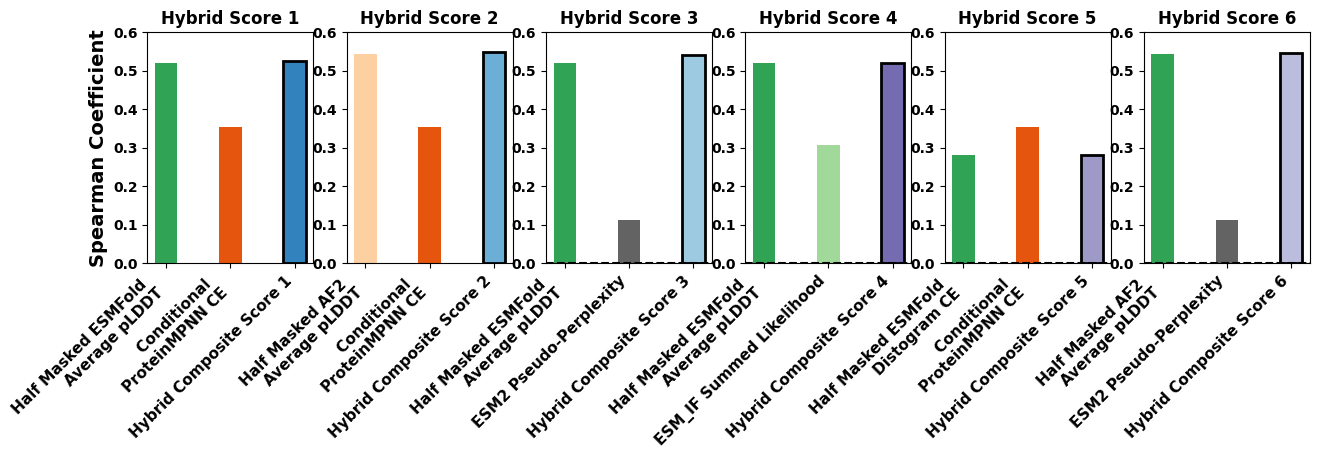

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:213: UserWarning: FixedFormatter should only be used together with FixedLocator


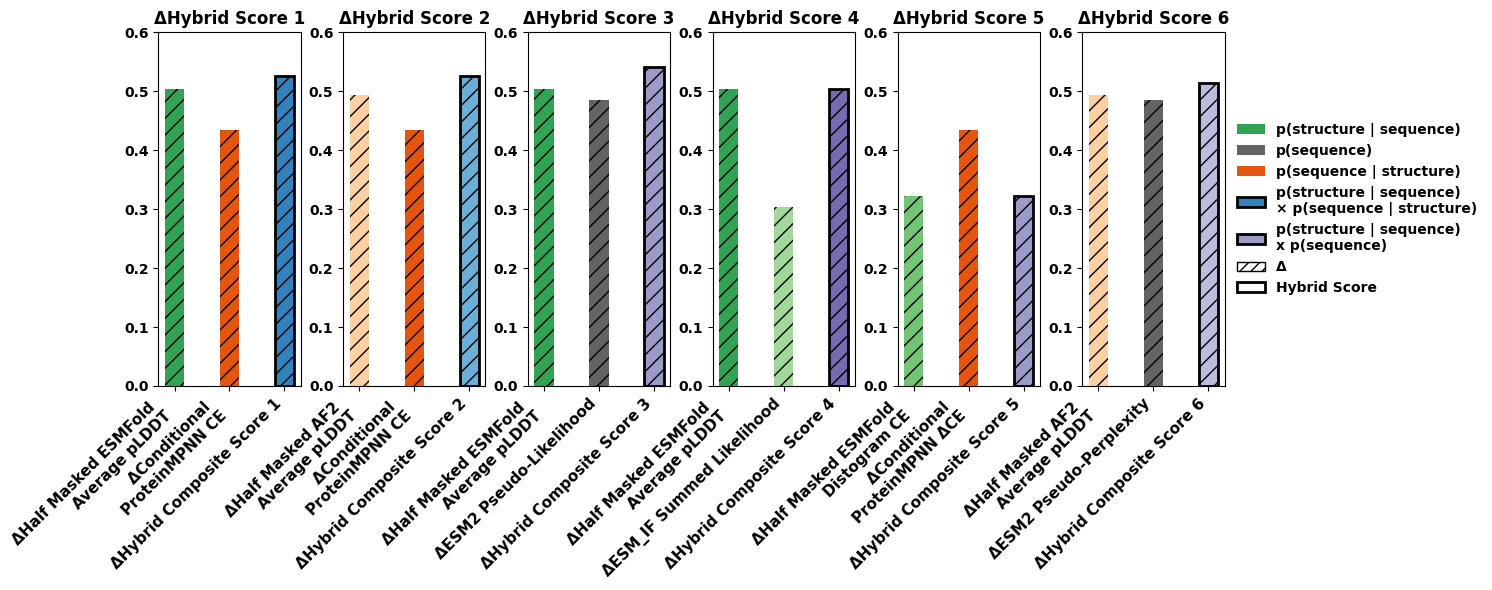

In [23]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch

colors = plt.cm.tab20c(np.linspace(0, 1, 20))

bar_width = 0.35  # Width of the bars
bar_positions = np.arange(3)

values_set1 = [data_s[:, 1][0], data_s[:, 7][0], data_s[:, 8][0]]
values_set2 = [data_s[:, 5][0], data_s[:, 7][0], data_s[:, 11][0]]
values_set3 = [data_s[:, 1][0], data_s[:, 3][0], data_s[:, 14][0]]

values_set4 = [data_s[:, 1][0], data_s[:, 15][0], data_s[:, 16][0]]
values_set5 = [data_s[:, 13][0], data_s[:, 7][0], data_s[:, 17][0]]
values_set6 = [data_s[:, 5][0], data_s[:, 3][0], data_s[:, 18][0]]

color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[7,4,1]]
color_set3 = colors[[8,16,2]]


color_set4 =  colors[[8,10,12]]
color_set5 =  colors[[8,4,13]]
color_set6 = colors[[8,16,14]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set2 = ['Half Masked AF2 \nAverage pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 2']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Perplexity', 'Hybrid Composite Score 3']
labels_set4 = ['Half Masked ESMFold \n Average pLDDT', 'ESM_IF Summed Likelihood', 'Hybrid Composite Score 4']
labels_set5= ['Half Masked ESMFold \n Distogram CE', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 5']
labels_set6 = ['Half Masked AF2 \nAverage pLDDT', 'ESM2 Pseudo-Perplexity', 'Hybrid Composite Score 6']


fig, axes = plt.subplots(1, 6, figsize=(15, 3))
for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[0].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[0].bar(pos, value, bar_width, label=label, color=color)

axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(labels_set1, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[0].set_ylabel('Spearman Coefficient', weight = 'bold', fontsize= 14)
axes[0].set_title('Hybrid Score 1', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set2, labels_set2, color_set2):
    if pos == 2:  
        axes[1].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[1].bar(pos, value, bar_width, label=label, color=color)

axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(labels_set2, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[1].set_title('Hybrid Score 2', weight = 'bold')

# Mixing colors for the third set
for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[2].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[2].bar(pos, value, bar_width, label=label, color=color)

axes[2].set_xticks(bar_positions)
axes[2].set_xticklabels(labels_set3, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[2].set_title('Hybrid Score 3', weight = 'bold')
axes[2].axhline(color='black', linestyle='--')


for pos, value, label, color in zip(bar_positions, values_set4, labels_set4, color_set4):
    if pos == 2:  
        axes[3].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[3].bar(pos, value, bar_width, label=label, color=color)

axes[3].set_xticks(bar_positions)
axes[3].set_xticklabels(labels_set4, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[3].set_title('Hybrid Score 4', weight = 'bold')
axes[3].axhline(color='black', linestyle='--')


for pos, value, label, color in zip(bar_positions, values_set5, labels_set5, color_set5):
    if pos == 2:  
        axes[4].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[4].bar(pos, value, bar_width, label=label, color=color)

axes[4].set_xticks(bar_positions)
axes[4].set_xticklabels(labels_set5, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[4].set_title('Hybrid Score 5', weight = 'bold')
axes[4].axhline(color='black', linestyle='--')



for pos, value, label, color in zip(bar_positions, values_set6, labels_set6, color_set6):
    if pos == 2:  
        axes[5].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[5].bar(pos, value, bar_width, label=label, color=color)

axes[5].set_xticks(bar_positions)
axes[5].set_xticklabels(labels_set6, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[5].set_title('Hybrid Score 6', weight = 'bold')
axes[5].axhline(color='black', linestyle='--')

for ax in axes:
    ax.set_ylim([0,0.6])
    ax.set_yticklabels(np.arange(0, 0.6, 0.1), weight='bold')
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
plt.show()

fig, axes = plt.subplots(1, 6, figsize=(15, 6))
bar_width = 0.35  # Width of the bars
bar_positions = np.arange(3)


values_set1 = [dd_s[:, 1][0], dd_s[:, 7][0], dd_s[:, 8][0]]
values_set2 = [dd_s[:, 5][0], dd_s[:, 7][0], dd_s[:, 11][0]]
values_set3 = [dd_s[:, 1][0], dd_s[:, 3][0], dd_s[:, 14][0]]

values_set4 = [dd_s[:, 1][0], dd_s[:, 15][0], dd_s[:, 16][0]]
values_set5 = [dd_s[:, 13][0], dd_s[:, 7][0], dd_s[:, 17][0]]
values_set6 = [dd_s[:, 5][0], dd_s[:, 3][0], dd_s[:, 18][0]]


color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[7,4,1]]
color_set3 = colors[[8,16,13]]

color_set4 =  colors[[8,10,12]]
color_set5 =  colors[[9,4,13]]
color_set6 = colors[[7,16,14]]



labels_set1 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 1']
labels_set2 = ['ΔHalf Masked AF2 \nAverage pLDDT', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 2']
labels_set3 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔESM2 Pseudo-Likelihood', 'ΔHybrid Composite Score 3']
labels_set4 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔESM_IF Summed Likelihood', 'ΔHybrid Composite Score 4']
labels_set5= ['ΔHalf Masked ESMFold \n Distogram CE', 'ΔConditional \n ProteinMPNN ΔCE', 'ΔHybrid Composite Score 5']
labels_set6 = ['ΔHalf Masked AF2 \nAverage pLDDT', 'ΔESM2 Pseudo-Perplexity', 'ΔHybrid Composite Score 6']



for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2: 
        axes[0].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[0].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(labels_set1, rotation=45, ha="right", weight = 'bold', fontsize= 11)

axes[0].set_title('ΔHybrid Score 1', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set2, labels_set2, color_set2):
    if pos == 2:  
        axes[1].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[1].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(labels_set2, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[1].set_title('ΔHybrid Score 2', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[2].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[2].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[2].set_xticks(bar_positions)
axes[2].set_xticklabels(labels_set3, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[2].set_title('ΔHybrid Score 3', weight = 'bold')




for pos, value, label, color in zip(bar_positions, values_set4, labels_set4, color_set4):
    if pos == 2: 
        axes[3].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[3].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[3].set_xticks(bar_positions)
axes[3].set_xticklabels(labels_set4, rotation=45, ha="right", weight = 'bold', fontsize= 11)
axes[3].set_title('ΔHybrid Score 4', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set5, labels_set5, color_set5):
    if pos == 2:  
        axes[4].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[4].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[4].set_xticks(bar_positions)
axes[4].set_xticklabels(labels_set5, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[4].set_title('ΔHybrid Score 5', weight = 'bold')

for pos, value, label, color in zip(bar_positions, values_set6, labels_set6, color_set6):
    if pos == 2:  
        axes[5].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[5].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[5].set_xticks(bar_positions)
axes[5].set_xticklabels(labels_set6, rotation=45, ha="right", weight = 'bold',  fontsize= 11)
axes[5].set_title('ΔHybrid Score 6', weight = 'bold')


for ax in axes:
    ax.set_ylim([0,0.6])
    ax.set_yticklabels(np.arange(0, 0.6, 0.1), weight='bold')
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))


color_set1 =  colors[[8,4,0]]
color_set2 =  colors[[9,4,1]]
color_set3 = colors[[8,16,2]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set2 = ['Half Masked ESMFold \n Distogram CE', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 2']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Likelihood', 'Hybrid Composite Score 3']


legend_elements = [Patch(facecolor=colors[8], label='p(structure | sequence)')]
legend_elements += [Patch(facecolor=colors[16], label='p(sequence)')]
legend_elements += [Patch(facecolor=colors[4], label='p(sequence | structure)')]
legend_elements += [Patch(facecolor=colors[0], edgecolor='black',linewidth=2,label='p(structure | sequence)\n× p(sequence | structure)')]
legend_elements += [Patch(facecolor=colors[13],edgecolor='black', linewidth=2,label='p(structure | sequence)\nx p(sequence)')]
legend_elements += [Patch(facecolor='none', edgecolor='black', hatch='///', label='Δ')]
legend_elements += [Patch(facecolor='none', edgecolor='black', linewidth=2, label='Hybrid Score')]
axes[5].legend(handles=legend_elements, frameon=False,loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, prop={'weight':'bold'})

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/models_combined_figure3_3scores.png',  dpi=300)

# plt.show()

/home/jupyter-yehlin/.conda/envs/joint_design1/lib/python3.7/site-packages/ipykernel_launcher.py:91: UserWarning: FixedFormatter should only be used together with FixedLocator


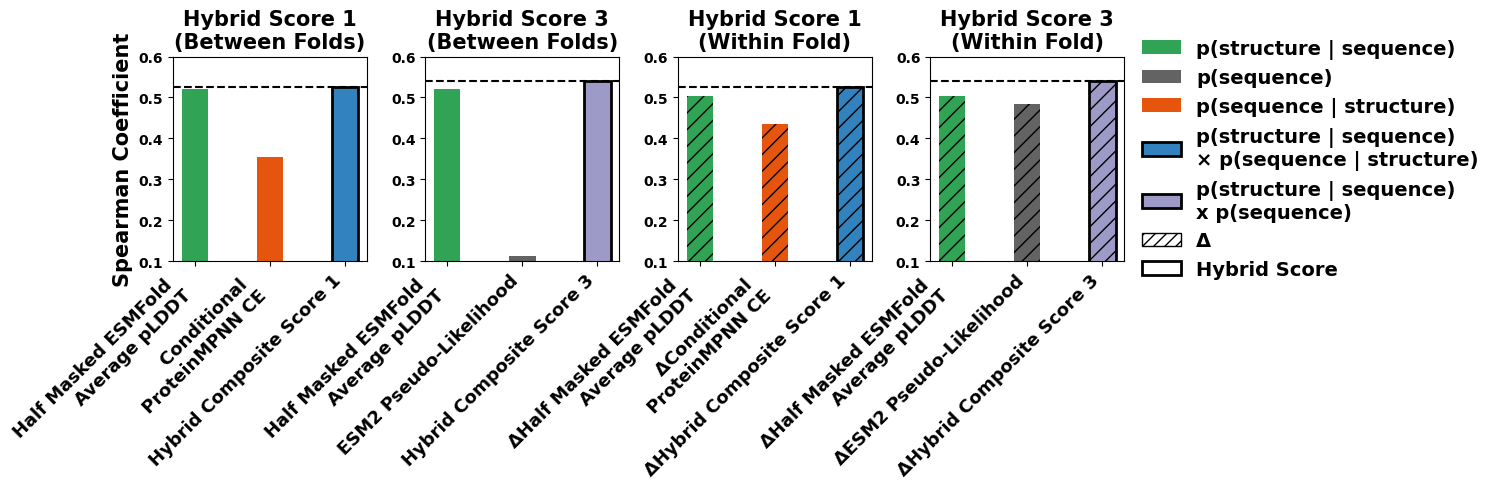

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch

colors = plt.cm.tab20c(np.linspace(0, 1, 20))

bar_width = 0.35 


bar_positions = np.arange(3)

values_set1 = [data_s[:, 1][0], data_s[:, 7][0], data_s[:, 8][0]]
values_set3 = [data_s[:, 1][0], data_s[:, 3][0], data_s[:, 14][0]]

color_set1 =  colors[[8,4,0]]
color_set3 = colors[[8,16,13]]

labels_set1 = ['Half Masked ESMFold \n Average pLDDT', 'Conditional \n ProteinMPNN CE', 'Hybrid Composite Score 1']
labels_set3 = ['Half Masked ESMFold \n Average pLDDT', 'ESM2 Pseudo-Likelihood', 'Hybrid Composite Score 3']

fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[0].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[0].bar(pos, value, bar_width, label=label, color=color)

axes[0].set_xticks(bar_positions)
axes[0].set_xticklabels(labels_set1, rotation=45, ha="right", weight='bold', fontsize=13)
axes[0].set_ylabel('Spearman Coefficient', weight='bold', fontsize=15)
axes[0].set_title('Hybrid Score 1\n(Between Folds)', weight='bold', fontsize=15)


max_value_set1 = max(values_set1)
axes[0].axhline(max_value_set1, color='black', linestyle='--')


for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  # Check if it's the third item
        axes[1].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2)
    else:
        axes[1].bar(pos, value, bar_width, label=label, color=color)

axes[1].set_xticks(bar_positions)
axes[1].set_xticklabels(labels_set3, rotation=45, ha="right", weight='bold', fontsize=13)
axes[1].set_title('Hybrid Score 3\n(Between Folds)', weight='bold', fontsize=15)

max_value_set3 = max(values_set3)
axes[1].axhline(max_value_set3, color='black', linestyle='--')

values_set1 = [dd_s[:, 1][0], dd_s[:, 7][0], dd_s[:, 8][0]]
values_set3 = [dd_s[:, 1][0], dd_s[:, 3][0], dd_s[:, 14][0]]

color_set1 = colors[[8, 4, 0]]
color_set3 = colors[[8, 16, 13]]

labels_set1 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔConditional \n ProteinMPNN CE', 'ΔHybrid Composite Score 1']
labels_set3 = ['ΔHalf Masked ESMFold \n Average pLDDT', 'ΔESM2 Pseudo-Likelihood', 'ΔHybrid Composite Score 3']


for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    if pos == 2:  
        axes[2].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[2].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[2].set_xticks(bar_positions)
axes[2].set_xticklabels(labels_set1, rotation=45, ha="right", weight='bold', fontsize=13)
axes[2].set_title('Hybrid Score 1\n(Within Fold)', weight='bold', fontsize=15)

max_value_delta_set1 = max(values_set1)
axes[2].axhline(max_value_delta_set1, color='black', linestyle='--')

for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    if pos == 2:  
        axes[3].bar(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2, hatch='//')
    else:
        axes[3].bar(pos, value, bar_width, label=label, color=color, hatch='//')

axes[3].set_xticks(bar_positions)
axes[3].set_xticklabels(labels_set3, rotation=45, ha="right", weight='bold', fontsize=13)
axes[3].set_title('Hybrid Score 3\n(Within Fold)', weight='bold', fontsize=15)


max_value_delta_set3 = max(values_set3)
axes[3].axhline(max_value_delta_set3, color='black', linestyle='--')

for ax in axes:
    ax.set_ylim([0.1, 0.6])
    ax.set_yticklabels(np.arange(0.1, 0.6, 0.1), weight='bold')
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))

legend_elements = [
    Patch(facecolor=colors[8], label='p(structure | sequence)'),
    Patch(facecolor=colors[16], label='p(sequence)'),
    Patch(facecolor=colors[4], label='p(sequence | structure)'),
    Patch(facecolor=colors[0], edgecolor='black', linewidth=2, label='p(structure | sequence)\n× p(sequence | structure)'),
    Patch(facecolor=colors[13], edgecolor='black', linewidth=2, label='p(structure | sequence)\nx p(sequence)'),
    Patch(facecolor='none', edgecolor='black', hatch='///', label='Δ'),
    Patch(facecolor='none', edgecolor='black', linewidth=2, label='Hybrid Score')
]
axes[3].legend(handles=legend_elements, frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), fontsize=15, prop={'weight': 'bold', "size": 14})

plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/models_combined_figure3_2scores_logESM.png', dpi=300)

plt.show()

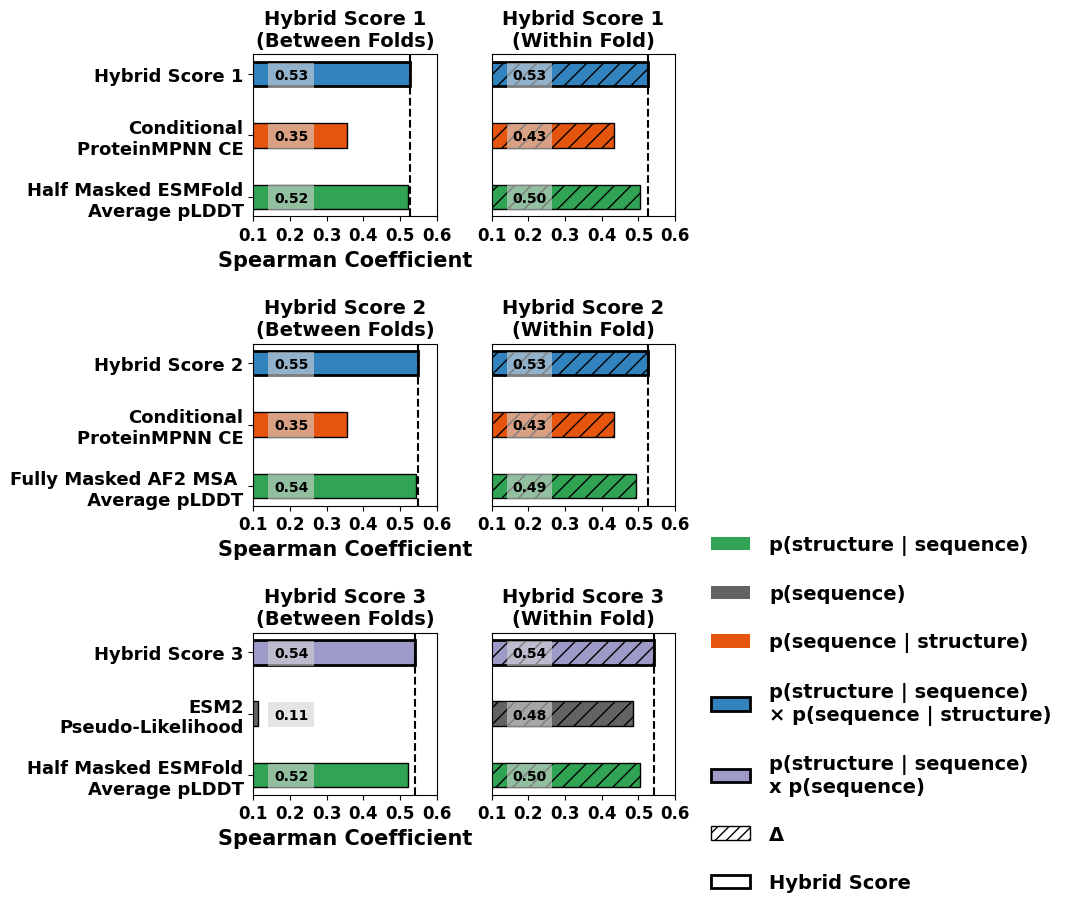

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
from matplotlib.patches import Patch



colors = plt.cm.tab20c(np.linspace(0, 1, 20))

bar_width = 0.4 
bar_positions = np.arange(3)  

values_set1 = [data_s[:, 1][0], data_s[:, 7][0], data_s[:, 8][0]]
values_set2 = [data_s[:, 5][0], data_s[:, 7][0], data_s[:, 11][0]]
values_set3 = [data_s[:, 1][0], data_s[:, 3][0], data_s[:, 14][0]]


color_set1 = colors[[8, 4, 0]]
color_set2 = colors[[8, 4, 0]]
color_set3 = colors[[8, 16, 13]]


labels_set1 = ['Half Masked ESMFold\nAverage pLDDT', 'Conditional\nProteinMPNN CE', 'Hybrid Score 1']
labels_set2 = ['Fully Masked AF2 MSA \n Average pLDDT', 'Conditional\nProteinMPNN CE', 'Hybrid Score 2']
labels_set3 = ['Half Masked ESMFold\nAverage pLDDT', 'ESM2\nPseudo-Likelihood', 'Hybrid Score 3']


fig, axes = plt.subplots(3, 2, figsize=(11, 9))


for pos, value, label, color in zip(bar_positions, values_set1, labels_set1, color_set1):
    bar = axes[0, 0].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1)
    axes[0, 0].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[0, 0].set_yticks(bar_positions)
axes[0, 0].set_yticklabels(labels_set1, weight='bold', fontsize=13)
axes[0, 0].set_xlabel('Spearman Coefficient', weight='bold', fontsize=15)
axes[0, 0].set_title('Hybrid Score 1\n(Between Folds)', weight='bold', fontsize=14)

max_value_set1 = max(values_set1)
axes[0, 0].axvline(max_value_set1, color='black', linestyle='--')


values_delta_set1 = [dd_s[:, 1][0], dd_s[:, 7][0], dd_s[:, 8][0]]
for pos, value, label, color in zip(bar_positions, values_delta_set1, labels_set1, color_set1):
    bar = axes[0, 1].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1, hatch='//')
    axes[0, 1].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[0, 1].set_yticks([])
axes[0, 1].set_title('Hybrid Score 1\n(Within Fold)', weight='bold', fontsize=14)

max_value_delta_set1 = max(values_delta_set1)
axes[0, 1].axvline(max_value_delta_set1, color='black', linestyle='--')

# Plot for Hybrid Score 2 (Row 2, Column 1)
for pos, value, label, color in zip(bar_positions, values_set2, labels_set2, color_set2):
    bar = axes[1, 0].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1)
    axes[1, 0].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[1, 0].set_yticks(bar_positions)
axes[1, 0].set_yticklabels(labels_set2, weight='bold', fontsize=13)
axes[1, 0].set_xlabel('Spearman Coefficient', weight='bold', fontsize=15)
axes[1, 0].set_title('Hybrid Score 2\n(Between Folds)', weight='bold', fontsize=14)

max_value_set2 = max(values_set2)
axes[1, 0].axvline(max_value_set2, color='black', linestyle='--')

values_delta_set2 = [dd_s[:, 5][0], dd_s[:, 7][0], dd_s[:, 11][0]]
for pos, value, label, color in zip(bar_positions, values_delta_set2, labels_set2, color_set2):
    bar = axes[1, 1].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1, hatch='//')
    axes[1, 1].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[1, 1].set_yticks([])
axes[1, 1].set_title('Hybrid Score 2\n(Within Fold)', weight='bold', fontsize=14)

max_value_delta_set2 = max(values_delta_set2)
axes[1, 1].axvline(max_value_delta_set2, color='black', linestyle='--')

for pos, value, label, color in zip(bar_positions, values_set3, labels_set3, color_set3):
    bar = axes[2, 0].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1)
    axes[2, 0].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[2, 0].set_yticks(bar_positions)
axes[2, 0].set_yticklabels(labels_set3, weight='bold', fontsize=13)
axes[2, 0].set_xlabel('Spearman Coefficient', weight='bold', fontsize=15)
axes[2, 0].set_title('Hybrid Score 3\n(Between Folds)', weight='bold', fontsize=14)

max_value_set3 = max(values_set3)
axes[2, 0].axvline(max_value_set3, color='black', linestyle='--')

# Plot for ΔHybrid Score 3 (Row 3, Column 2)
values_delta_set3 = [dd_s[:, 1][0], dd_s[:, 3][0], dd_s[:, 14][0]]
for pos, value, label, color in zip(bar_positions, values_delta_set3, labels_set3, color_set3):
    bar = axes[2, 1].barh(pos, value, bar_width, label=label, color=color, edgecolor='black', linewidth=2 if pos == 2 else 1, hatch='//')
    axes[2, 1].text(0.25, pos-0.13, f'{value:.2f}', va='bottom', ha='right', fontweight='bold', fontsize=10,
                    bbox=dict(facecolor='lightgray', edgecolor='none', alpha=0.6))

axes[2, 1].set_yticks([])
axes[2, 1].set_title('Hybrid Score 3\n(Within Fold)', weight='bold', fontsize=14)

max_value_delta_set3 = max(values_delta_set3)
axes[2, 1].axvline(max_value_delta_set3, color='black', linestyle='--')

# Set x-limits and formats
for ax in axes.flatten():
    ax.set_xlim([0.1, 0.6])
    ax.set_xticks(np.arange(0.1, 0.7, 0.1),)
    ax.xaxis.set_major_formatter(StrMethodFormatter('{x:.1f}'))
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
        label.set_fontsize(12)

legend_elements = [
    Patch(facecolor=colors[8], label='p(structure | sequence)'),
    Patch(facecolor=colors[16], label='p(sequence)'),
    Patch(facecolor=colors[4], label='p(sequence | structure)'),
    Patch(facecolor=colors[0], edgecolor='black', linewidth=2, label='p(structure | sequence)\n× p(sequence | structure)'),
    Patch(facecolor=colors[13], edgecolor='black', linewidth=2, label='p(structure | sequence)\nx p(sequence)'),
    Patch(facecolor='none', edgecolor='black', hatch='///', label='Δ'),
    Patch(facecolor='none', edgecolor='black', linewidth=2, label='Hybrid Score')
]
axes[2, 1].legend(
    handles=legend_elements,
    frameon=False,
    loc='center left',
    bbox_to_anchor=(1.1, 0.5),
    fontsize=15,
    prop={'weight': 'bold', "size": 14},
    handletextpad=1.0,  # Increase space between legend handle and text
    labelspacing=1.5     # Increase space between legend lines
)

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(wspace=0.3)

# Save the figure
plt.savefig('/home/jupyter-yehlin/DMSV2/final_figures_all_4/models_combined_figure3_2scores_logESM_horizontal_2x2_swapped.png', dpi=300)

# Show the plot
plt.show()


## 1-1 Comparision

In [26]:
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt


def scatter_and_correlation_color_experiment_datapoint(ax, df, x_column, y_column, label_x, label_y, color_column, xlim=None, ylim=None, colorbar=False, show_y_label= False):
    
    df_no_nan = df[[x_column, y_column, color_column]].dropna()

    sc = ax.scatter(df_no_nan[x_column].tolist(), df_no_nan[y_column].tolist(), c=df_no_nan[color_column], cmap='bwr', marker='o', alpha=0.5, s=5)

                                              
    ax.set_xlabel(label_x, fontsize=14, weight= 'bold')
    if show_y_label:
        ax.set_ylabel(label_y, fontsize=14, weight= 'bold')

    if xlim is not None:
        ax.set_xlim(xlim)
    if ylim is not None:
        ax.set_ylim(ylim)


    pearson_coefficient, _ = pearsonr(df_no_nan[x_column], df_no_nan[y_column])

    spearman_coefficient, _ = spearmanr(df_no_nan[x_column], df_no_nan[y_column])

    ax.text(0.5, 0.90, f"Spearman Coeff: {spearman_coefficient:.2f}", transform=ax.transAxes,
            horizontalalignment='center', verticalalignment='top', fontsize=14, weight= 'bold')
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12)
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    if colorbar:
        cbar = plt.colorbar(sc, ax=ax, label='ΔG')

    return pearson_coefficient, spearman_coefficient

def plot_computation_vs_computation(ylabel ='log10_K50_t', ylabel_print_name = '', save_dir=''):
    
    fig, axs = plt.subplots(2, 6, figsize=(20, 7), dpi=200)
    axs = axs.flatten()

    p1,s1=scatter_and_correlation_color_experiment_datapoint(axs[0], test, 'avg_mask_esmfold_plddt_recyc2', ylabel, 'Half Masked \n ESMFold Average pLDDT', ylabel_print_name, 'deltaG', show_y_label=True)
    p2,s2=scatter_and_correlation_color_experiment_datapoint(axs[1], test, 'CE_full', ylabel, 'Full Sequence \n ESMFold Distogram CE', ylabel_print_name, 'deltaG')
    p3,s3=scatter_and_correlation_color_experiment_datapoint(axs[2], test, 'CE_avg_mask', ylabel, 'Half Masked \n ESMFold  Distogram CE', ylabel_print_name, 'deltaG')
    p5,s5=scatter_and_correlation_color_experiment_datapoint(axs[4], test, 'af_plddt_mask1_recyc0_avg8', ylabel, 'Fully Masked AF2 MSA Average pLDDT', ylabel_print_name, 'deltaG')
    p4,s4=scatter_and_correlation_color_experiment_datapoint(axs[3], test, 'ESM Score', ylabel, 'ESM2 Pseudo-Likelihood', ylabel_print_name, 'deltaG')
    p12,s12=scatter_and_correlation_color_experiment_datapoint(axs[6], test, 'dg_IF', ylabel, 'ESM-IF Summed Likelihood', ylabel_print_name, 'deltaG')
    p6,s6=scatter_and_correlation_color_experiment_datapoint(axs[5], test, 'inter_pae',ylabel, 'AlphaFold Inter-PAE', ylabel_print_name, 'deltaG', show_y_label=True)
    p7,s7=scatter_and_correlation_color_experiment_datapoint(axs[7], test, 'unconditional_CE', ylabel, 'Unconditional \n ProteinMPNN CE', ylabel_print_name, 'deltaG')
    p8,s8=scatter_and_correlation_color_experiment_datapoint(axs[8], test, 'conditional_CE', ylabel, 'Conditional \n ProteinMPNN CE', ylabel_print_name, 'deltaG')
    p9,s9=scatter_and_correlation_color_experiment_datapoint(axs[9], test, 'Hybrid Composite Score 1', ylabel, 'Hybrid Composite Score 1', ylabel_print_name, 'deltaG')
    p10,s10=scatter_and_correlation_color_experiment_datapoint(axs[10], test, 'Hybrid Composite Score 2', ylabel, 'Hybrid Composite Score 2', ylabel_print_name, 'deltaG')
    p11,s11=scatter_and_correlation_color_experiment_datapoint(axs[11], test, 'Hybrid Composite Score 3', ylabel, 'Hybrid Composite Score 3', ylabel_print_name, 'deltaG', colorbar=True)

    plt.tight_layout()
    
    
    plt.savefig(save_dir, dpi=300)
    
    plt.show()

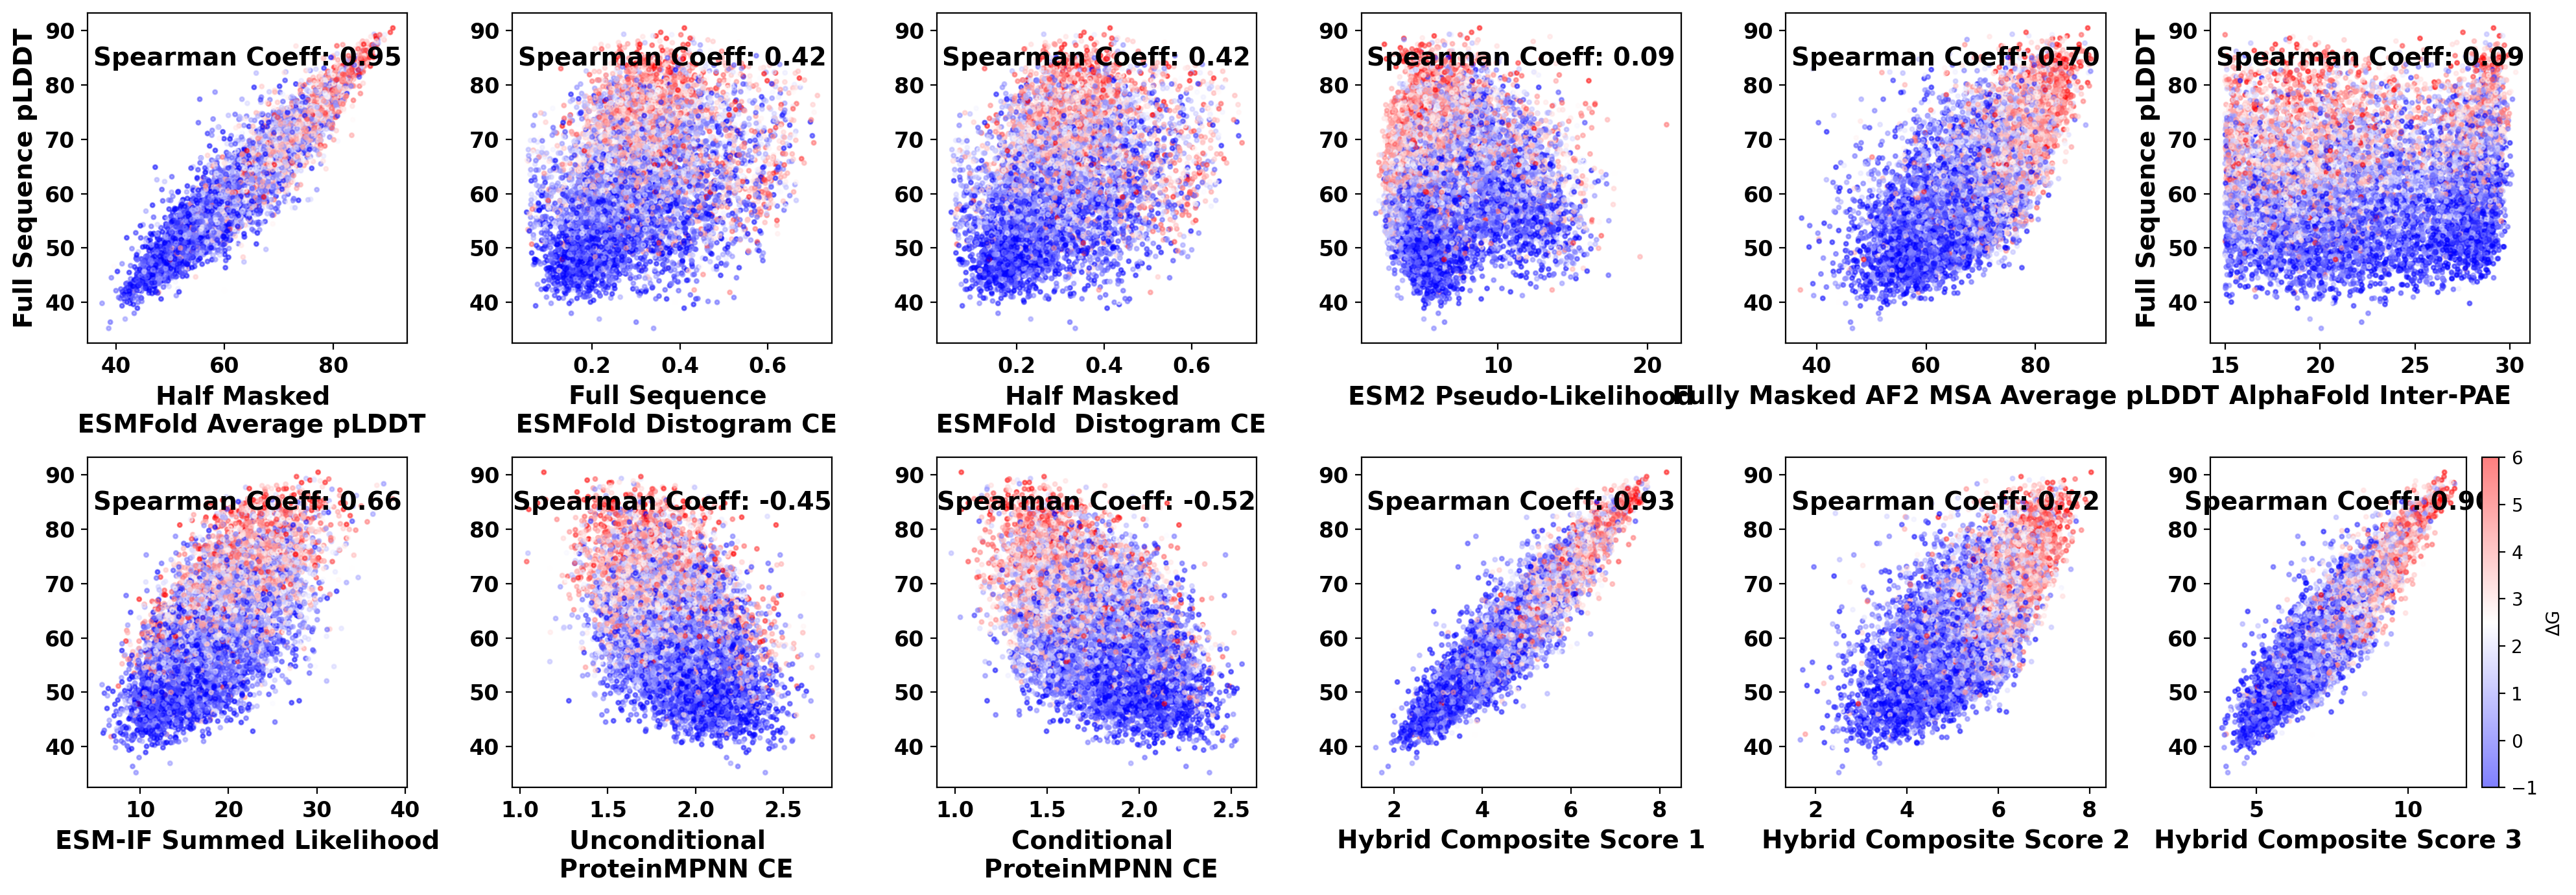

In [27]:
plot_computation_vs_computation('esmfold_plddt_recyc3', 'Full Sequence pLDDT', '/home/jupyter-yehlin/DMSV2/final_figures_all_4/one_to_one_model_correlation_figure_2.png')

Cohen's d for Hybrid Composite Score 2: 2.349
Cohen's d for AF2 pLDDT: 1.957
Cohen's d for ProteinMPNN CE: -1.216
Cohen's d for ESM-IF pppl: 1.063


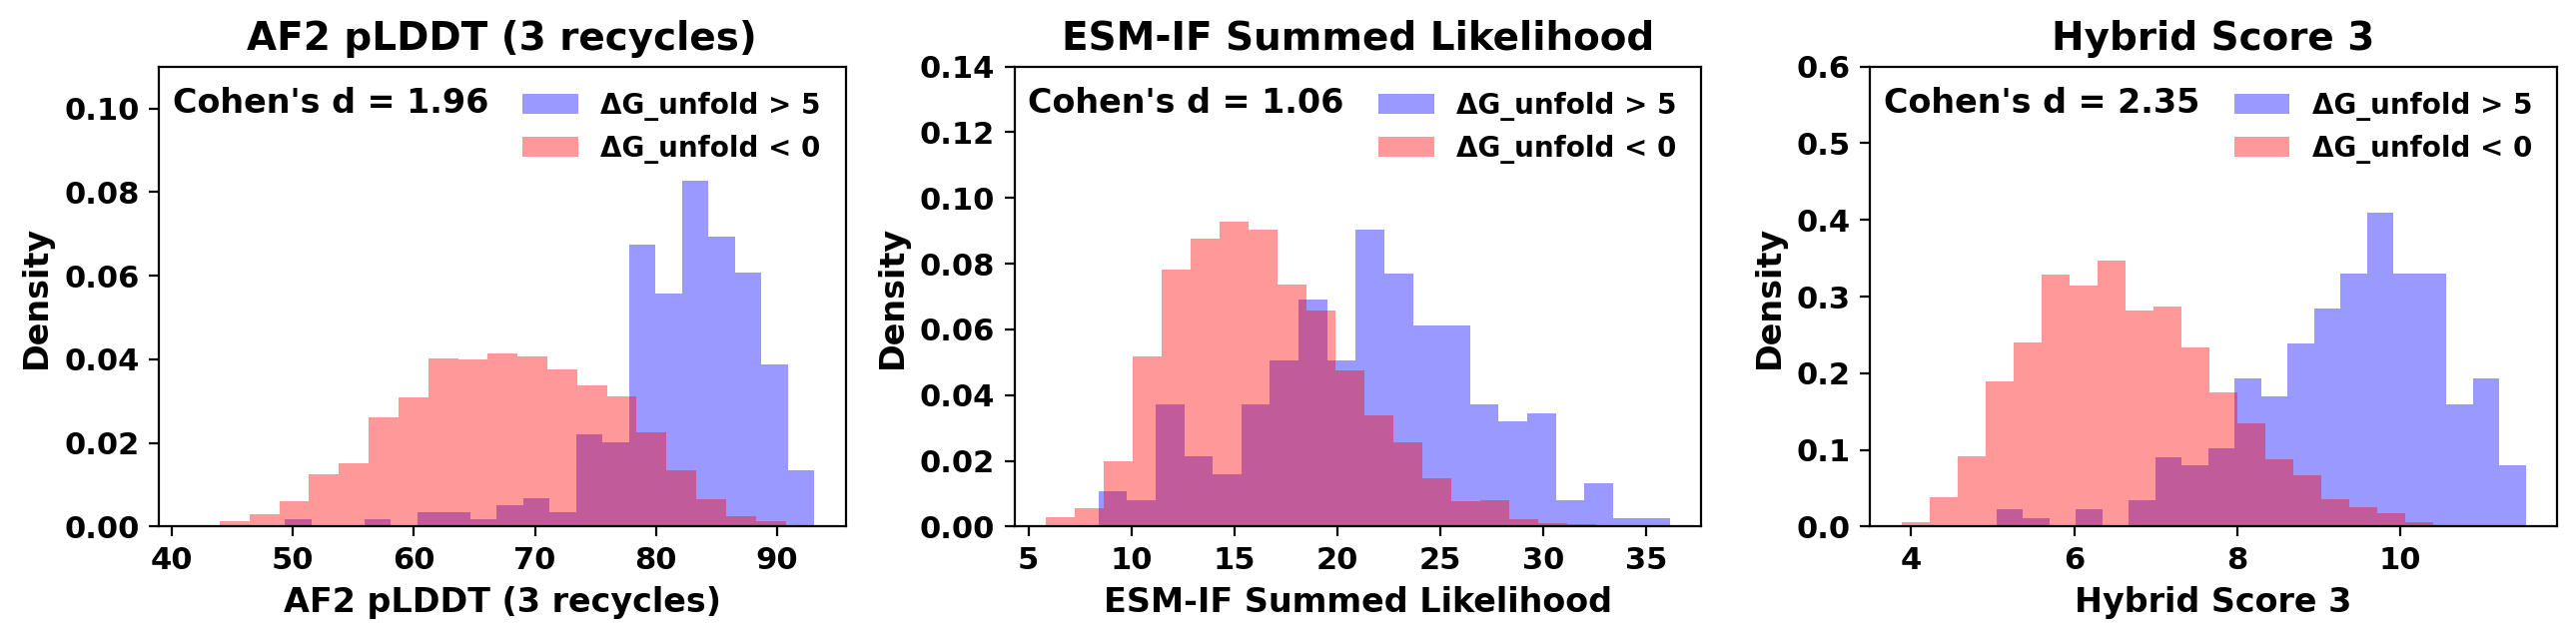

In [28]:
from matplotlib import font_manager
import matplotlib.pyplot as plt

def calculate_cohens_d(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    pooled_std = np.sqrt((group1.std() ** 2 + group2.std() ** 2) / 2)
    cohen_d = mean_diff / pooled_std
    return cohen_d

group1_hybrid = test[test['deltaG'] >= 5]['Hybrid Composite Score 3']
group2_hybrid = test[test['deltaG'] < 0]['Hybrid Composite Score 3']
cohen_d_hybrid = calculate_cohens_d(group1_hybrid, group2_hybrid)
print(f"Cohen's d for Hybrid Composite Score 2: {cohen_d_hybrid:.3f}")

group1_plddt = test[test['deltaG'] >= 5]['af_plddt_recyc3']
group2_plddt = test[test['deltaG'] < 0]['af_plddt_recyc3']
cohen_d_plddt = calculate_cohens_d(group1_plddt, group2_plddt)
print(f"Cohen's d for AF2 pLDDT: {cohen_d_plddt:.3f}")

group1_ce = test[test['deltaG'] >= 5]['conditional_CE']
group2_ce = test[test['deltaG'] < 0]['conditional_CE']
cohen_d_ce = calculate_cohens_d(group1_ce, group2_ce)
print(f"Cohen's d for ProteinMPNN CE: {cohen_d_ce:.3f}")

group1_if = test[test['deltaG'] >= 5]['dg_IF']
group2_if = test[test['deltaG'] < 0]['dg_IF']
cohen_d_if = calculate_cohens_d(group1_if, group2_if)
print(f"Cohen's d for ESM-IF pppl: {cohen_d_if:.3f}")



font_properties = font_manager.FontProperties(weight='bold')

fig, axs = plt.subplots(1, 3, figsize=(13, 3.3), dpi=200)


axs[0].hist(group1_plddt, alpha=0.4, label='ΔG_unfold > 5', density=True, bins=20, color='blue')
axs[0].hist(group2_plddt, alpha=0.4, label='ΔG_unfold < 0', density=True, bins=20, color='red')
axs[0].set_xlabel('AF2 pLDDT (3 recycles)', fontsize=12, fontweight='bold')
axs[0].set_ylabel('Density', fontsize=12, fontweight='bold')
axs[0].set_title('AF2 pLDDT (3 recycles)', fontsize=14, fontweight='bold')
axs[0].legend(loc='best', frameon=False, fontsize=12, prop=font_properties)
axs[0].set_ylim(0, 0.11)

x_pos = axs[0].get_xlim()[0] + 0.02 * (axs[0].get_xlim()[1] - axs[0].get_xlim()[0])
y_pos = axs[0].get_ylim()[1] * 0.9
axs[0].text(x_pos, y_pos, f"Cohen's d = {cohen_d_plddt:.2f}", fontsize=12, fontweight='bold')



for label in axs[0].get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)

for label in axs[0].get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)


axs[1].hist(group1_if, alpha=0.4, label='ΔG_unfold > 5', density=True, bins=20, color='blue')
axs[1].hist(group2_if, alpha=0.4, label='ΔG_unfold < 0', density=True, bins=20, color='red')
axs[1].set_xlabel('ESM-IF Summed Likelihood', fontsize=12, fontweight='bold')
axs[1].set_ylabel('Density', fontsize=12, fontweight='bold')
axs[1].set_title('ESM-IF Summed Likelihood', fontsize=14, fontweight='bold')
axs[1].legend(loc='best', frameon=False, fontsize=12, prop=font_properties)
axs[1].set_ylim(0, 0.14)
x_pos = axs[1].get_xlim()[0] + 0.02 * (axs[1].get_xlim()[1] - axs[1].get_xlim()[0])
y_pos = axs[1].get_ylim()[1] * 0.9
axs[1].text(x_pos, y_pos, f"Cohen's d = {cohen_d_if:.2f}", fontsize=12, fontweight='bold')

for label in axs[1].get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)

for label in axs[1].get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)


axs[2].hist(group1_hybrid, alpha=0.4, label='ΔG_unfold > 5', density=True, bins=20, color='blue')
axs[2].hist(group2_hybrid, alpha=0.4, label='ΔG_unfold < 0', density=True, bins=20, color='red')
axs[2].set_xlabel('Hybrid Score 3', fontsize=12, fontweight='bold')
axs[2].set_ylabel('Density', fontsize=12, fontweight='bold')
axs[2].set_title('Hybrid Score 3', fontsize=14, fontweight='bold')
axs[2].legend(loc='best', frameon=False, fontsize=12, prop=font_properties)
axs[2].set_ylim(0, 0.6)

x_pos = axs[2].get_xlim()[0] + 0.02 * (axs[2].get_xlim()[1] - axs[2].get_xlim()[0])
y_pos = axs[2].get_ylim()[1] * 0.9
axs[2].text(x_pos, y_pos, f"Cohen's d = {cohen_d_hybrid:.2f}", fontsize=12, fontweight='bold')


for label in axs[2].get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)

for label in axs[2].get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(11)

plt.tight_layout()
plt.show()